In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# 2. load data
# combine data?

# Load the datasets
p_a = pd.read_csv('previous_application.csv')
c_a = pd.read_csv('application_data.csv')

In [4]:
p_a

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [5]:
# printing the statistical summary
print(p_a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
# print top 5 rows to check the data records
print(p_a.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

In [7]:
# printing the statistical summary
print(p_a.describe())

         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03  

In [8]:
c_a

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# printing the statistical summary
print(c_a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [10]:
# print top 5 rows to check the data records
print(c_a.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [11]:
# printing the statistical summary
print(c_a.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [12]:
#Checking missing values, treating the missing values
# Data cleaning -
# checking for missing values
p_a_null = p_a.isnull().sum()

#print list missing values from previous application
p_a_null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [13]:
# Data cleaning -
# checking for missing values
c_a_null = c_a.isnull().sum()

#Print
c_a_null

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [14]:
# Fill the missing value with "0" 
# Check missing values before fill
print("Missing values before fillna:", p_a[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 
                                            'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE','RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
                                            'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION',
                                           'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
                                           'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']].isnull().sum())

# Fill missing values with 0 for multiple columns
p_a_clean = p_a.fillna(value={
    'AMT_ANNUITY': 0,
    'AMT_CREDIT': 0,
    'AMT_DOWN_PAYMENT': 0,
    'AMT_GOODS_PRICE': 0,
    'RATE_DOWN_PAYMENT': 0,
    'AMT_GOODS_PRICE': 0,
    'RATE_DOWN_PAYMENT': 0,
    'RATE_INTEREST_PRIMARY': 0,
    'RATE_INTEREST_PRIVILEGED': 0,
    'NAME_TYPE_SUITE': 0,
    'CNT_PAYMENT': 0,
    'PRODUCT_COMBINATION': 0,
    'DAYS_FIRST_DRAWING': 0,
    'DAYS_FIRST_DUE': 0,
    'DAYS_LAST_DUE_1ST_VERSION': 0,
    'DAYS_LAST_DUE':0,
    'DAYS_TERMINATION':0,
    'NFLAG_INSURED_ON_APPROVAL':0
})

# Check missing values after fill
print("Missing values after fillna:", p_a_clean[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 
                                                 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY',
                                                 'RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','CNT_PAYMENT', 'PRODUCT_COMBINATION',
                                                'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
                                                'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']].isnull().sum())

Missing values before fillna: AMT_ANNUITY                   372235
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64
Missing values after fillna: AMT_ANNUITY                  0
AMT_CREDIT                   0
AMT_DOWN_PAYMENT             0
AMT_GOODS_PRICE              0
RATE_DOWN_PAYMENT            0
AMT_GOODS_PRICE              0
RATE_DOWN_PAYMENT            0
RATE_INTEREST_PRIMARY        0
RATE_INTEREST_

In [15]:
# Fill the missing value with "0"  for current application - c_a
# Check missing values before fill
print("Missing values before fillna:", c_a[['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                                           'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum())

# Fill missing values with 0 for multiple columns
c_a_clean = c_a.fillna(value={
    'AMT_REQ_CREDIT_BUREAU_DAY': 0,
    'AMT_REQ_CREDIT_BUREAU_WEEK':0,
    'AMT_REQ_CREDIT_BUREAU_MON': 0,
    'AMT_REQ_CREDIT_BUREAU_QRT': 0,
    'AMT_REQ_CREDIT_BUREAU_YEAR':0
   
})

# Check missing values after fill
print("Missing values after fillna:", c_a_clean[['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                                                'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum())


Missing values before fillna: AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64
Missing values after fillna: AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64


In [16]:
# Merge the datasets on a common column (e.g., 'SK_ID_CURR')
m_a = pd.merge(c_a_clean, p_a_clean, on='SK_ID_CURR', how='left')  # Change 'left' to 'inner', 'right', or 'outer' as needed

# Display the first few rows of the merged dataset
print(m_a.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  

In [17]:
# Remove '_x' from the end of the column names in the m_a dataset
m_a.columns = m_a.columns.str.replace('_x$', '', regex=True)

# Verify the change by printing the first few column names
print(m_a.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=158)


In [18]:
m_a

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1430151,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,0.0,XNA,Card Street,0.0,0.0,0.0,0.0,0.0,0.0
1430152,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,60.0,low_normal,Cash Street: low,0.0,0.0,0.0,0.0,0.0,0.0
1430153,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [19]:
# Target - either has difficulties = 1 or has no difficulties = 0

#default = had_difficulties
default=m_a[m_a['TARGET']==1] 
default

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
97,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
164,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,XNA,24.0,high,Cash X-Sell: high,365243.0,-1437.0,-747.0,-1167.0,-1163.0,1.0
165,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,XNA,36.0,low_normal,Cash Street: low,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430012,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,XNA,24.0,high,Cash X-Sell: high,365243.0,-912.0,-222.0,-342.0,-334.0,1.0
1430055,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-277.0,53.0,365243.0,365243.0,1.0
1430056,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,Consumer electronics,0.0,XNA,Card Street,-241.0,-204.0,365243.0,365243.0,365243.0,0.0
1430145,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Consumer electronics,16.0,low_normal,POS household with interest,365243.0,-247.0,203.0,365243.0,365243.0,1.0


In [20]:
# non-default = had_no_difficulties
non_default=m_a[m_a['TARGET']==0]
non_default

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1430151,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,0.0,XNA,Card Street,0.0,0.0,0.0,0.0,0.0,0.0
1430152,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,60.0,low_normal,Cash Street: low,0.0,0.0,0.0,0.0,0.0,0.0
1430153,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [21]:
# 5. Univariate analysis -  Looks at one variable (e.g., just age).

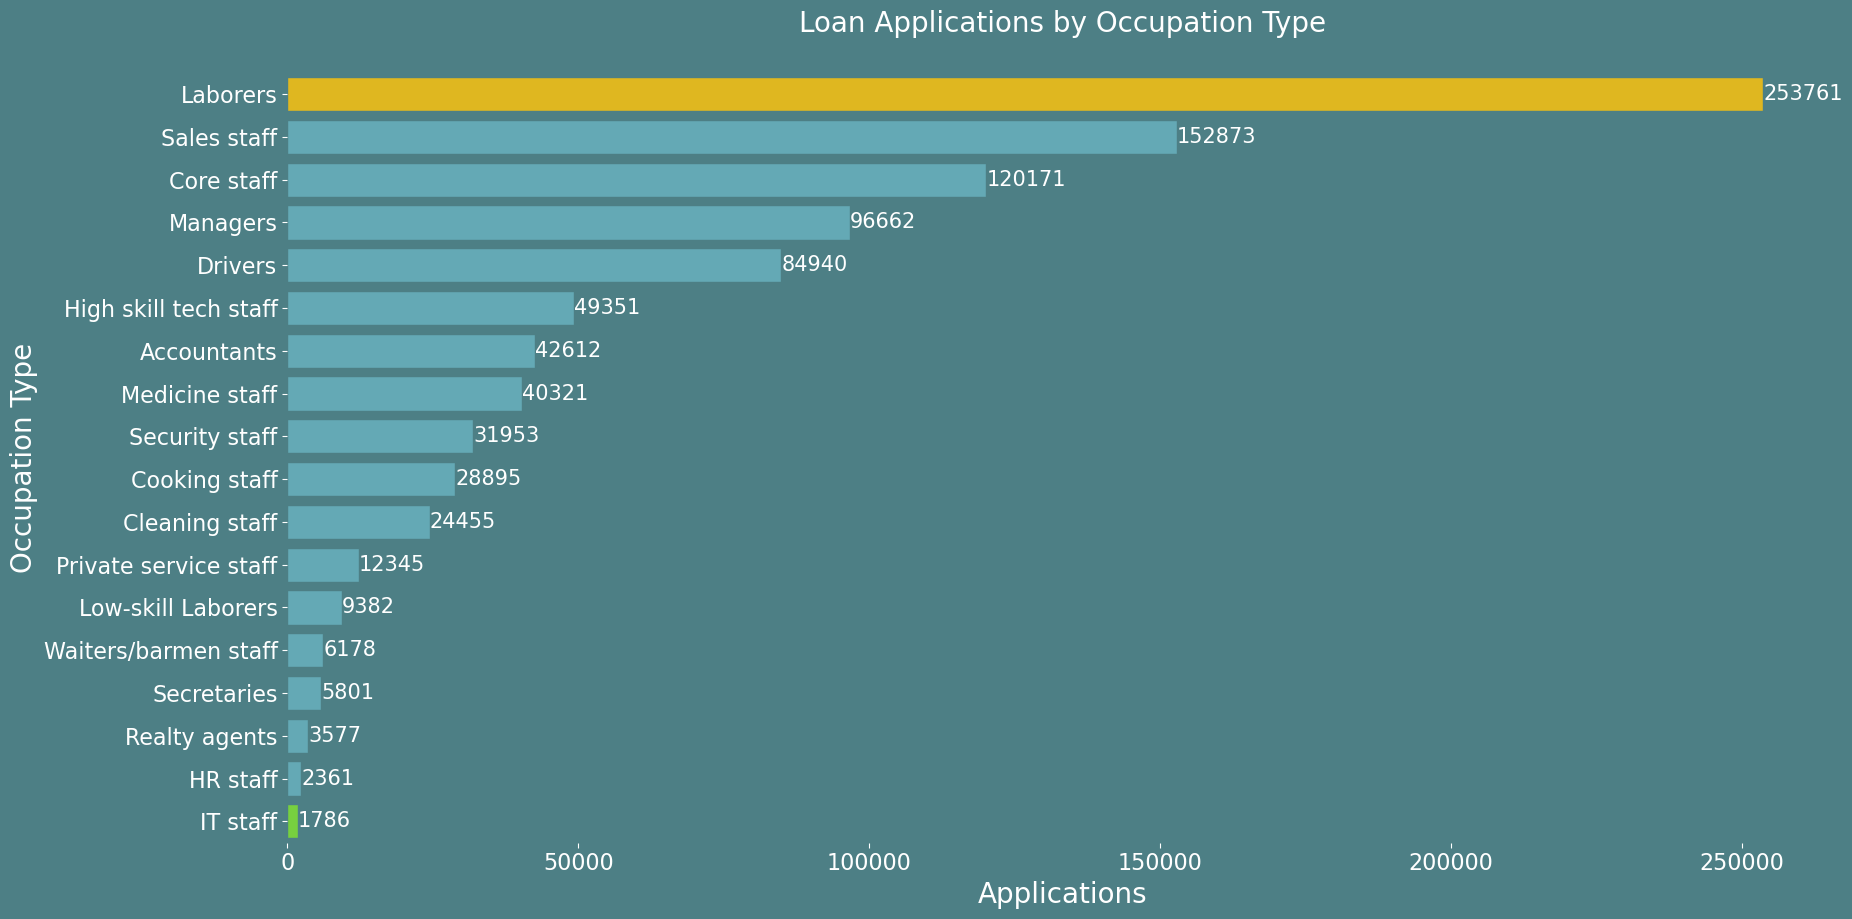

In [22]:
# Loan Applications by Occupation Type

# Set the background color of the figure to #4d7f85 (teal color)
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background to teal

# Filter out NaN or invalid occupation types if needed
filtered_data = m_a[m_a['OCCUPATION_TYPE'].notna()]

# Group the data by OCCUPATION_TYPE and count the occurrences, then sort in descending order
occupation_counts = filtered_data['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False)

# Convert the sorted index into a DataFrame for plotting
sorted_data = filtered_data[filtered_data['OCCUPATION_TYPE'].isin(occupation_counts.index)]

# Create a dictionary mapping specific occupations to their respective colors
color_map = {
    'Laborers': '#ffca00',  # Gold color for Laborers
    'IT staff': '#71e827'   # Blue color for IT staff
}

# Apply the default color '#82ad50' (green) to other occupations
custom_palette = [color_map.get(occupation, '#57b2c2') for occupation in occupation_counts.index]

# Create a single subplot for the occupation type count plot
ax = plt.subplot(1, 1, 1)  # Single subplot - Spectral

# Plot the count of applications by occupation type, using the sorted data, and remove borders around bars
bars = sns.countplot(y='OCCUPATION_TYPE', data=sorted_data, order=occupation_counts.index, 
                     palette=custom_palette, ax=ax, edgecolor='#4d7f85')  # Set edge color to background

# Set the background color of the axes to #4d7f85
ax.set_facecolor('#4d7f85')  # Set the internal background to teal

# Title and labels with white color
ax.set_title('Loan Applications by Occupation Type\n', 
             fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})
ax.set_xlabel("Applications", color='white', fontsize=20)  # Set Count on x-axis to white
ax.set_ylabel("Occupation Type", color='white', fontsize=20)  # Set Occupation Type on y-axis to white

# Set x and y ticks color to white and increase tick label size
ax.tick_params(axis='x', colors='white', labelsize=16)  # Increase x-axis label size
ax.tick_params(axis='y', colors='white', labelsize=16)  # Increase y-axis label size

# Remove the black border by hiding the spines
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)

# Adding number values on top of each bar, with white text
ax.bar_label(bars.containers[0], color='white', fontsize=15)  # Adding labels automatically

# Show the plot
plt.show()

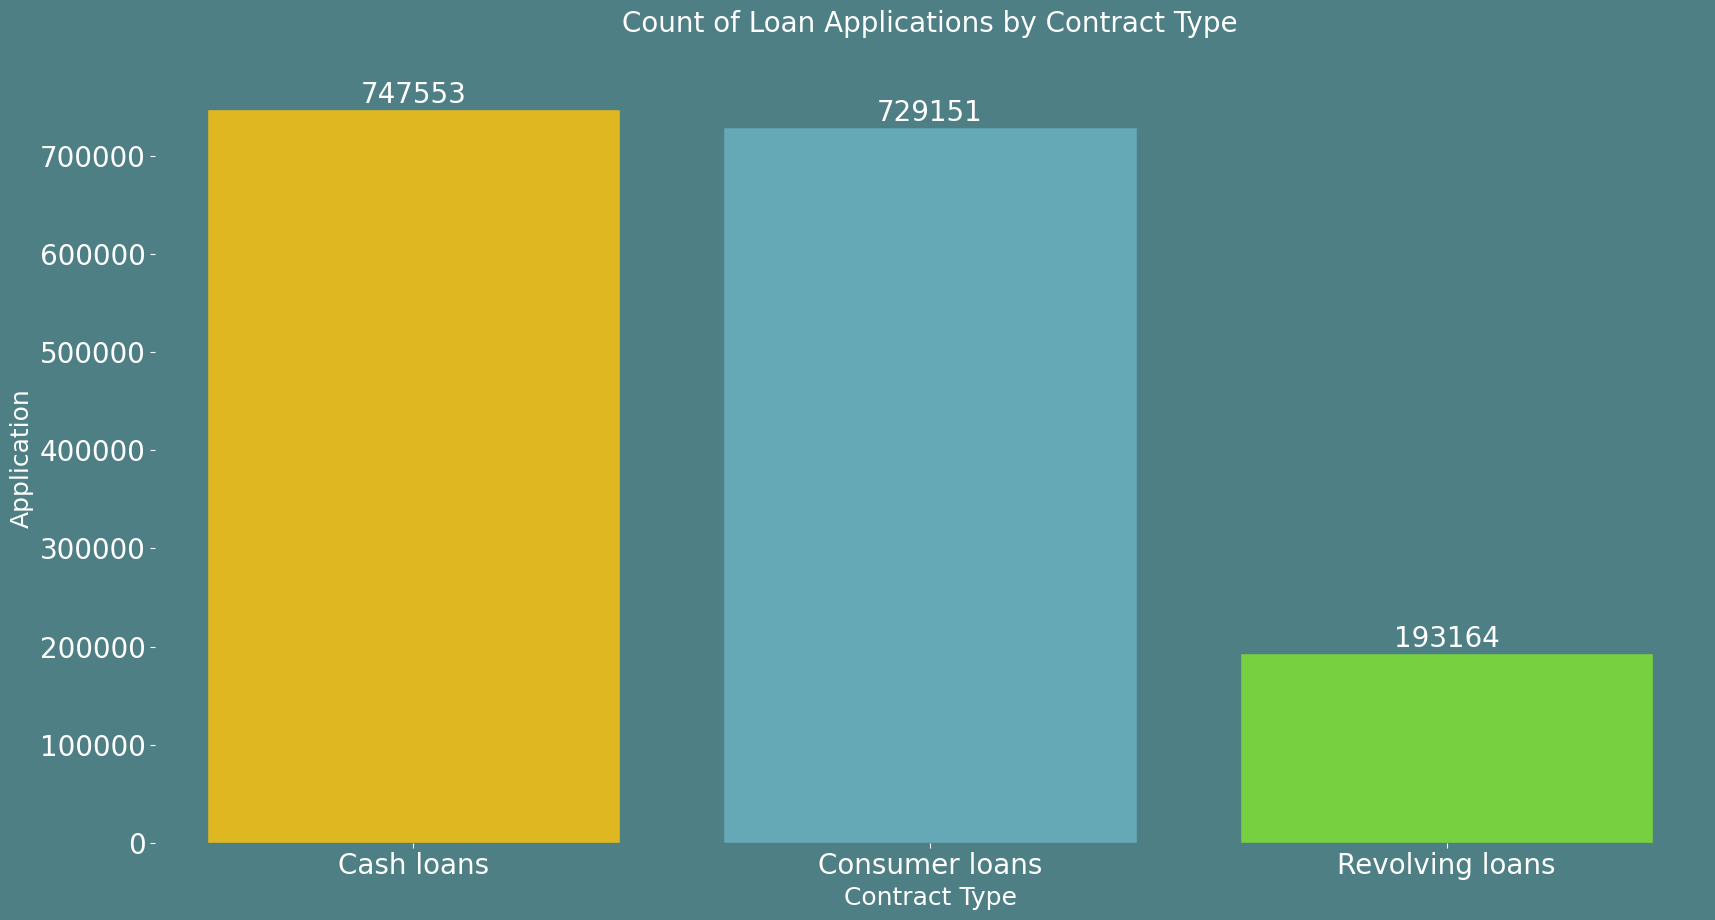

In [23]:
#Count of Loan Applications by Contract Type
# Filter/Remove 'XNA' from the NAME_CONTRACT_TYPE column
filtered_data = p_a[p_a['NAME_CONTRACT_TYPE'] != 'XNA']

# Count occurrences of each contract type and sort in descending order
contract_counts = filtered_data['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending=False).index

# Create a dictionary mapping specific contract types to their respective colors
color_map = {
    'Cash loans': '#ffca00',  # Gold color for 'Cash loans'
    'Consumer loans': '#57b2c2',  # Green color for 'Consumer loans'
    'Revolving loans': '#71e827'  # Blue color for 'Revolving loans'
}

# Apply the default color '#4d7f85' to other contract types
custom_palette = [color_map.get(contract, '#4d7f85') for contract in contract_counts]

# Create the figure with no edge color
fig, ax = plt.subplots(figsize=[20, 10], facecolor='#4d7f85', edgecolor='#4d7f85')  # Edge color set to none

# Create the countplot for NAME_CONTRACT_TYPE in descending order with no bar edges
sns.countplot(data=filtered_data, x='NAME_CONTRACT_TYPE', palette=custom_palette, order=contract_counts, ax=ax, edgecolor='#4d7f85')

# Set the background color of the axes to match the figure background
ax.set_facecolor('#4d7f85')  # Set the internal background

# Title and labels with white color
ax.set_title('Count of Loan Applications by Contract Type\n', 
             fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})
ax.set_xlabel("Contract Type", color='white', fontsize=18)  # Set Contract Type on x-axis to white
ax.set_ylabel("Application", color='white',  fontsize=18)  # Set Count on y-axis to white

# Set x and y ticks color to white and increase tick label size
ax.tick_params(axis='x', colors='white', labelsize=20)  # Increase x-axis label size
ax.tick_params(axis='y', colors='white', labelsize=20)  # Increase y-axis label size

# Remove the black border by hiding the spines
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)


# Adding number values on top of each bar
ax.bar_label(ax.containers[0], color='white', fontsize=20)  # Adding labels automatically

# Show the plot with no white edge
plt.show()


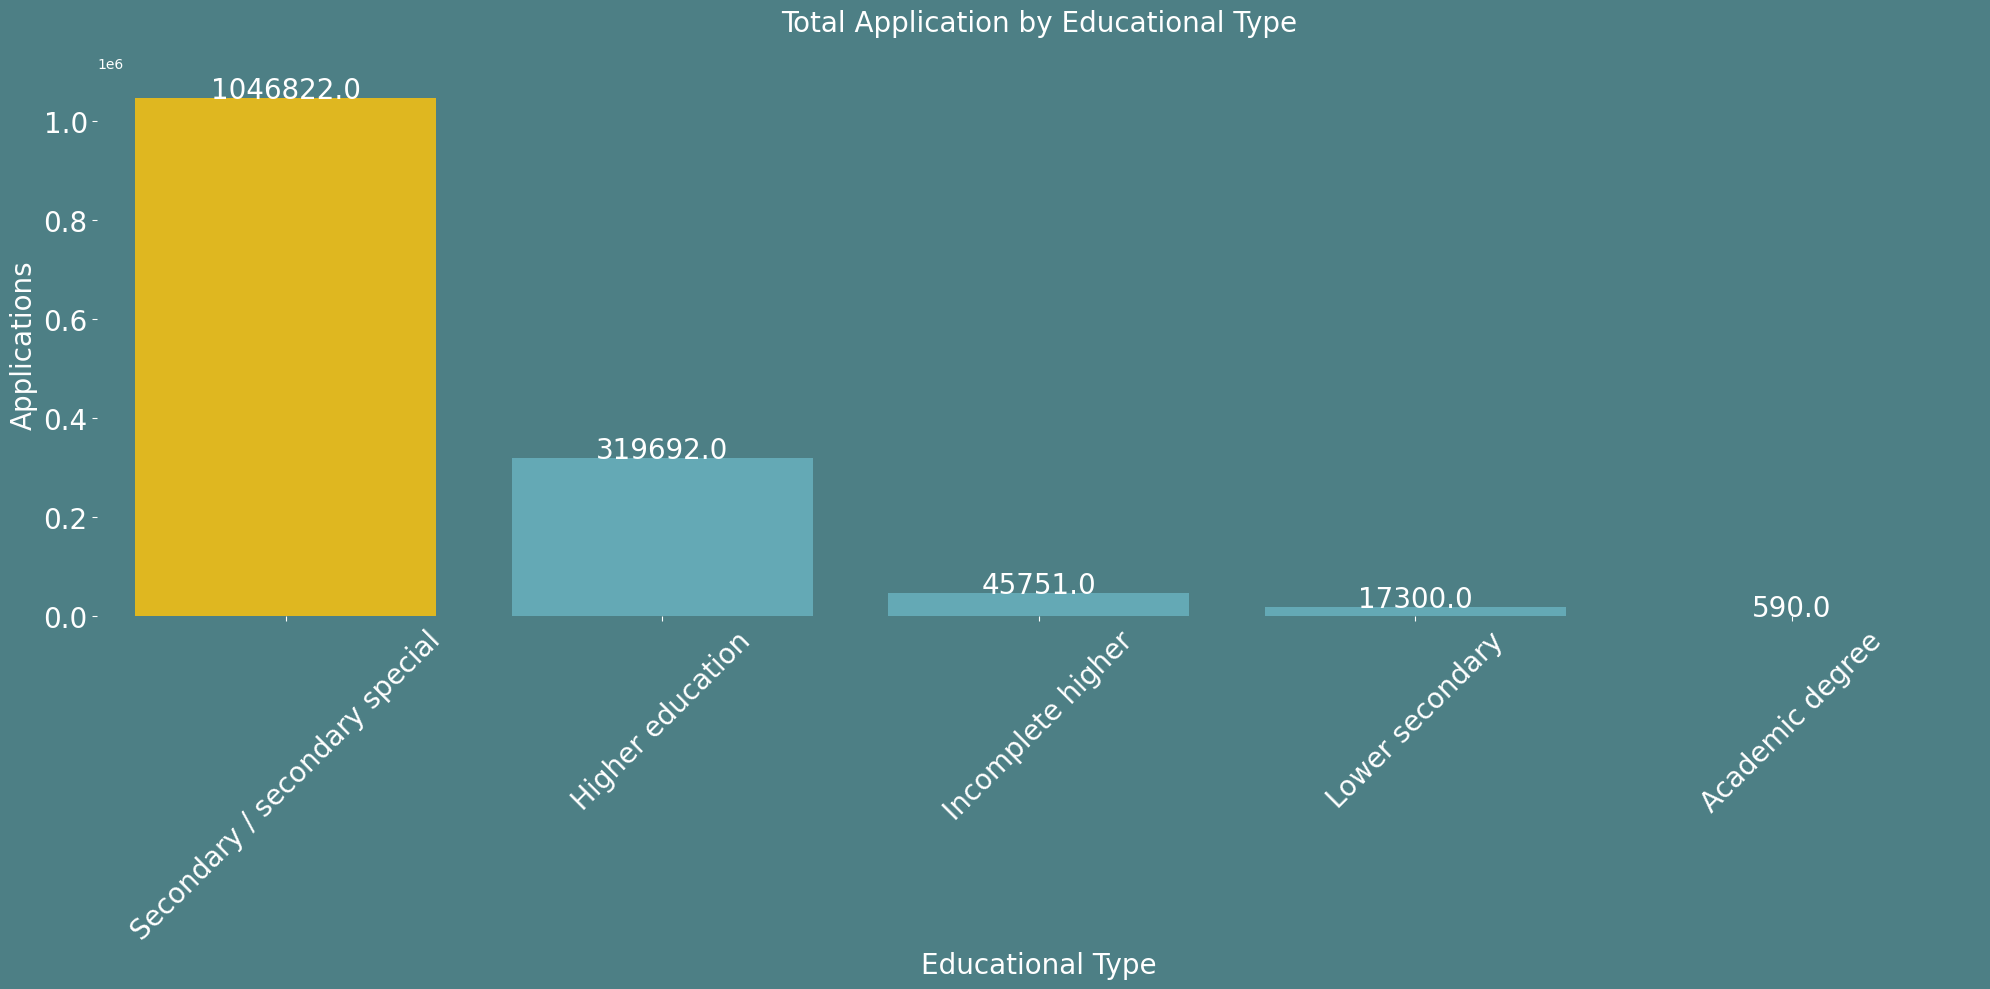

In [24]:
# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background

# Calculate counts for each education type
education_counts = m_a['NAME_EDUCATION_TYPE'].value_counts(sort=True)
order = education_counts.index  # Get the sorted order of education types

# Define a color palette for the education types
color_mapping = {
    'Academic degree': '#71e827',              # Green
    'Lower secondary': '#57b2c2',              # Blue
    'Higher education': '#57b2c2',             # Blue
    'Incomplete higher': '#57b2c2',            # Blue
    'Secondary / secondary special': '#ffca00' # Gold
}

# Create the countplot for NAME_EDUCATION_TYPE with custom colors and transparent edges
ax = sns.countplot(data=m_a, x='NAME_EDUCATION_TYPE', order=order, palette=color_mapping,
                   edgecolor='none')  # Set edgecolor to none to remove lines around bars

# Set the background color of the axes to match the figure
ax.set_facecolor('#4d7f85')  # Set the internal background

# Remove the spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Title and labels with white color and increased font size
ax.set_title('Total Application by Educational Type\n', 
             fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})
ax.set_xlabel("Educational Type", color='white', fontsize=20)  # Increase x-axis label font size
ax.set_ylabel("Applications", color='white', fontsize=20)  # Increase y-axis label font size

# Set x and y ticks color to white and increase tick label size
ax.tick_params(axis='x', colors='white', labelsize=20)  # Increase x-axis label size
ax.tick_params(axis='y', colors='white', labelsize=20)  # Increase y-axis label size

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', color='white', fontsize=20)

# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


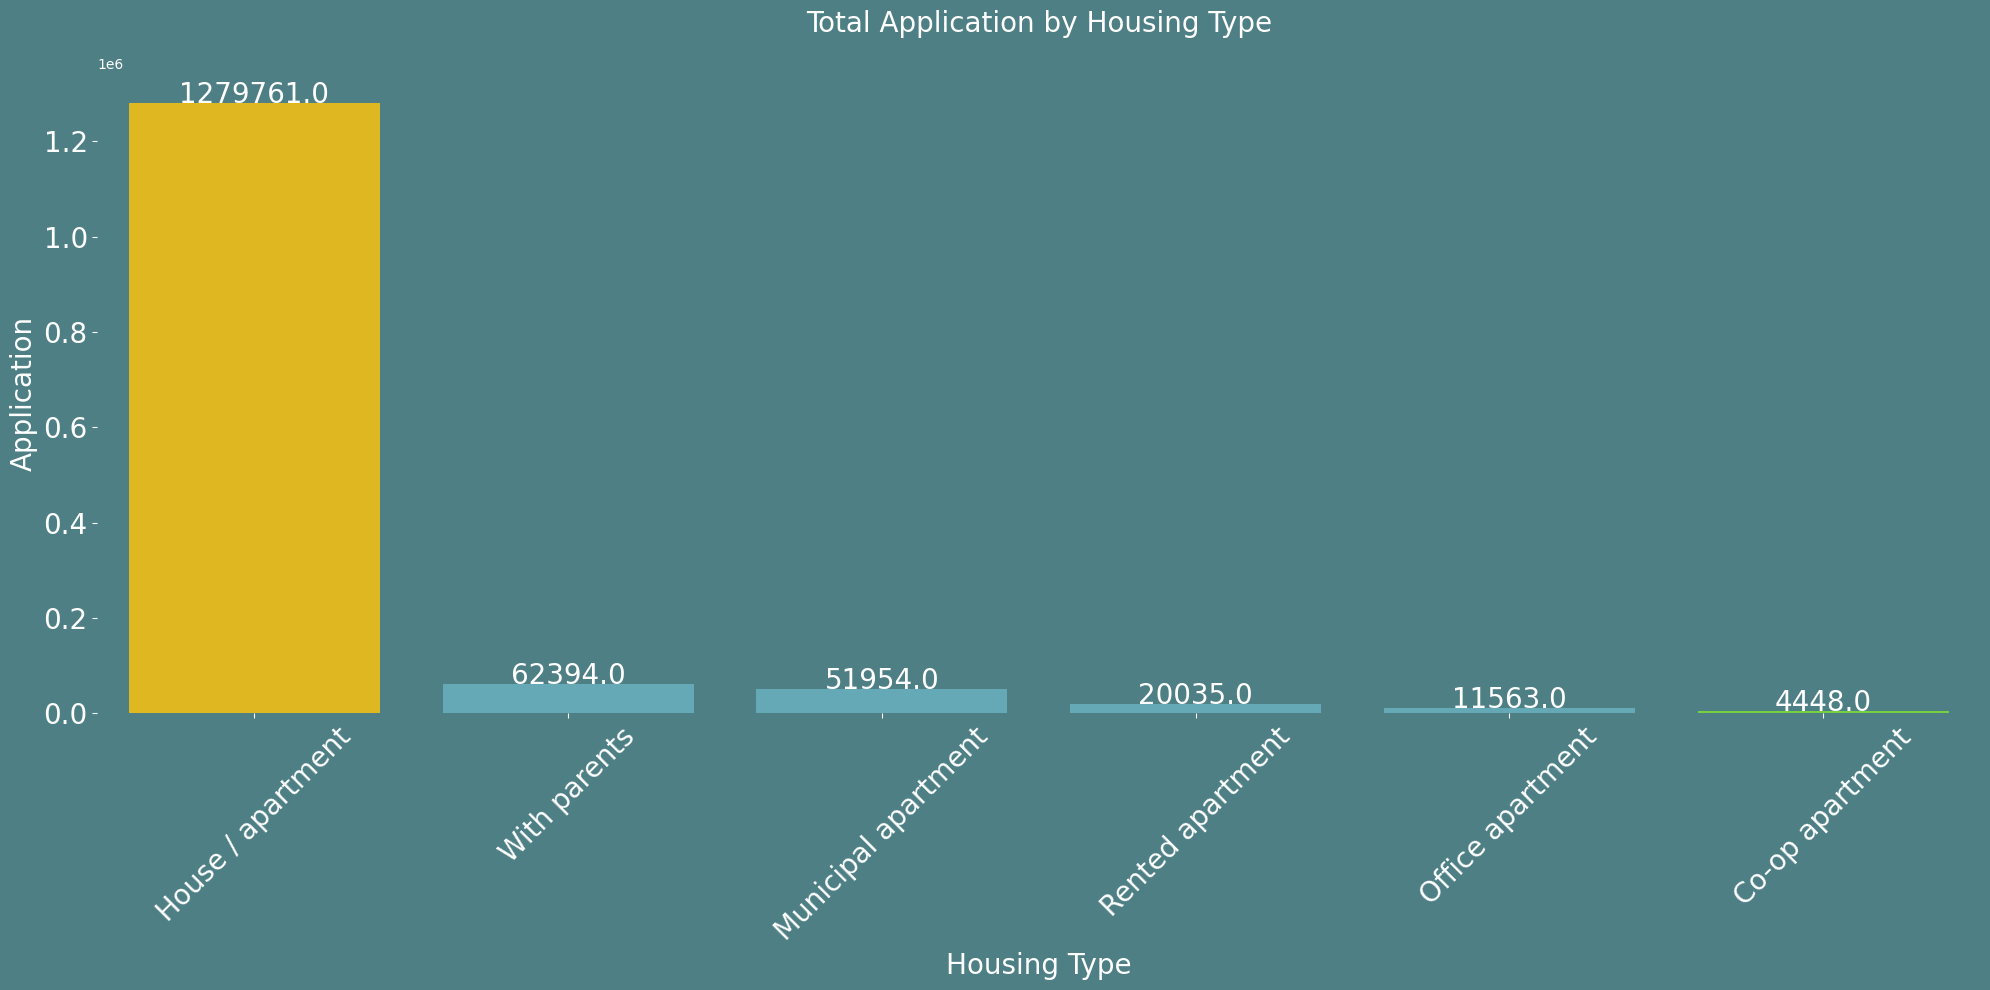

In [25]:

# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background

# Calculate counts for each housing type
housing_counts = m_a['NAME_HOUSING_TYPE'].value_counts(sort=True)
order = housing_counts.index  # Get the sorted order of housing types

# Create a custom color palette based on the housing types
custom_palette = {
    'House / apartment': "#ffca00",
    'Co-op apartment': "#71e827",
    'With parents': "#57b2c2",
    'Municipal apartment': "#57b2c2",
    'Rented apartment': "#57b2c2",
    'Office apartment': "#57b2c2",
    'Working': "#57b2c2"
}

# Create the countplot for NAME_HOUSING_TYPE with custom colors and transparent edges
ax = sns.countplot(data=m_a, x='NAME_HOUSING_TYPE', order=order, palette=custom_palette,
                   edgecolor='none')  # Set edgecolor to none to remove lines around bars

# Set the background color of the axes to match the figure
ax.set_facecolor('#4d7f85')  # Set the internal background

# Remove the spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Title and labels with white color
ax.set_title('Total Application by Housing Type\n', 
             fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})
ax.set_xlabel("Housing Type", color='white',fontsize=20)  # Set x-axis label
ax.set_ylabel("Application", color='white',  fontsize=20)  # Set y-axis label to "Count" to reflect number of occurrences

# Set x and y ticks color to white and increase tick label size
ax.tick_params(axis='x', colors='white', labelsize=20)  # Increase x-axis label size
ax.tick_params(axis='y', colors='white', labelsize=20)  # Increase y-axis label size

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', color='white', fontsize=20)

# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()



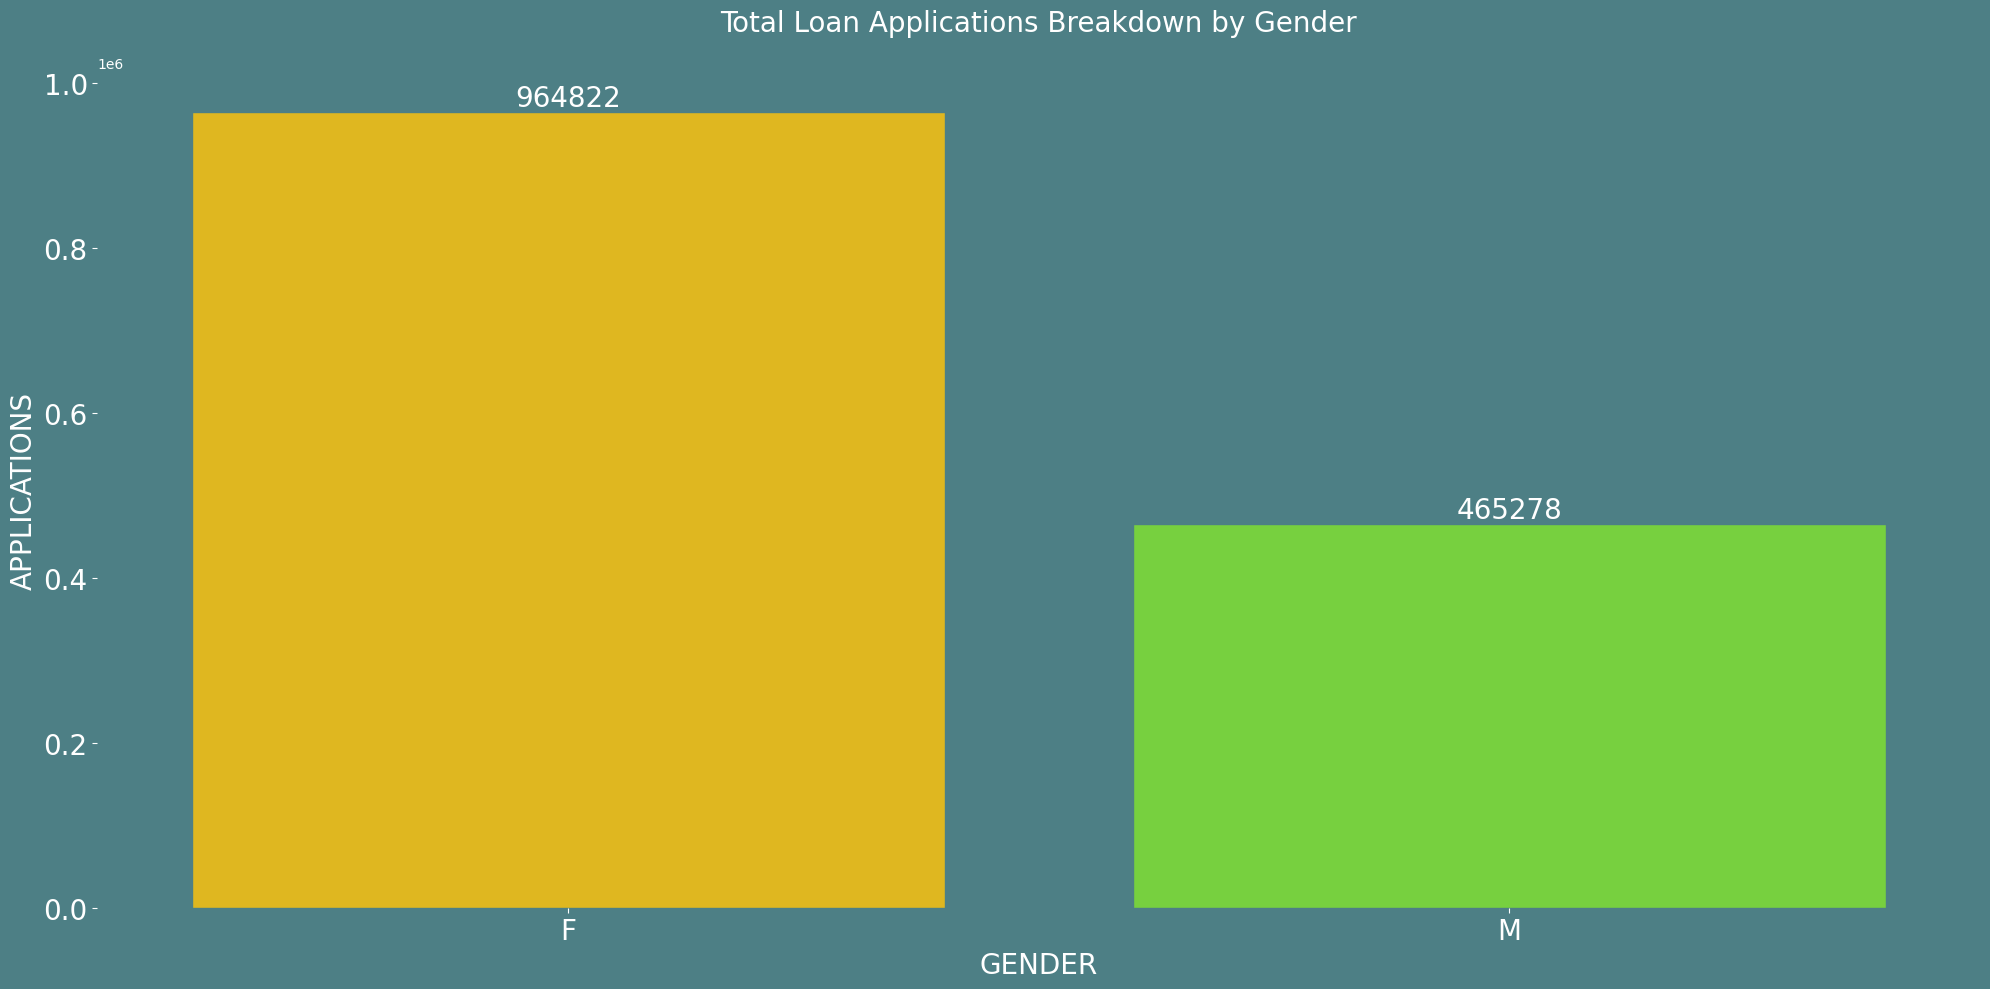

In [26]:
# Set the background color of the figure and the axes
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background 

# Filter/remove XNA from the data before plotting
filtered_data = m_a[m_a['CODE_GENDER'] != 'XNA']

# Calculate the counts for each gender and sort in descending order
gender_counts = filtered_data['CODE_GENDER'].value_counts().sort_values(ascending=False)

# Create a dictionary mapping specific gender codes to their respective colors
color_map = {
    'F': '#ffca00',  # Gold color for 'F' (female)
    'M': '#71e827'   # Green color for 'M' (male)
}

# Create a list of colors based on the sorted gender counts
colors = [color_map[gender] for gender in gender_counts.index]

# Create a single subplot for the filtered data
ax = plt.subplot(1, 1, 1)  # Single subplot

# Plot the sorted data with no edges on the bars and custom colors
bars = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors, ax=ax, edgecolor='#4d7f85')  # Set edgecolor to match the background

# Set the background color of the axes to #4d7f85
ax.set_facecolor('#4d7f85')  # Set the internal background

# Title and labels with white color
ax.set_title('Total Loan Applications Breakdown by Gender\n', 
             fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})
ax.set_xlabel("GENDER", color='white', fontsize=20)  # Set Gender on x-axis to white
ax.set_ylabel("APPLICATIONS", color='white', fontsize=20)  # Set Count on y-axis to white

# Set x and y ticks color to white
ax.tick_params(axis='x', colors='white', labelsize=20)  # Set x-axis ticks to white
ax.tick_params(axis='y', colors='white', labelsize=20)  # Set y-axis ticks to white

# Adding number values on top of each bar
ax.bar_label(bars.containers[0], color='white', fontsize=20)  # Adding labels automatically

# Remove the black border by hiding the spines
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)
    
# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


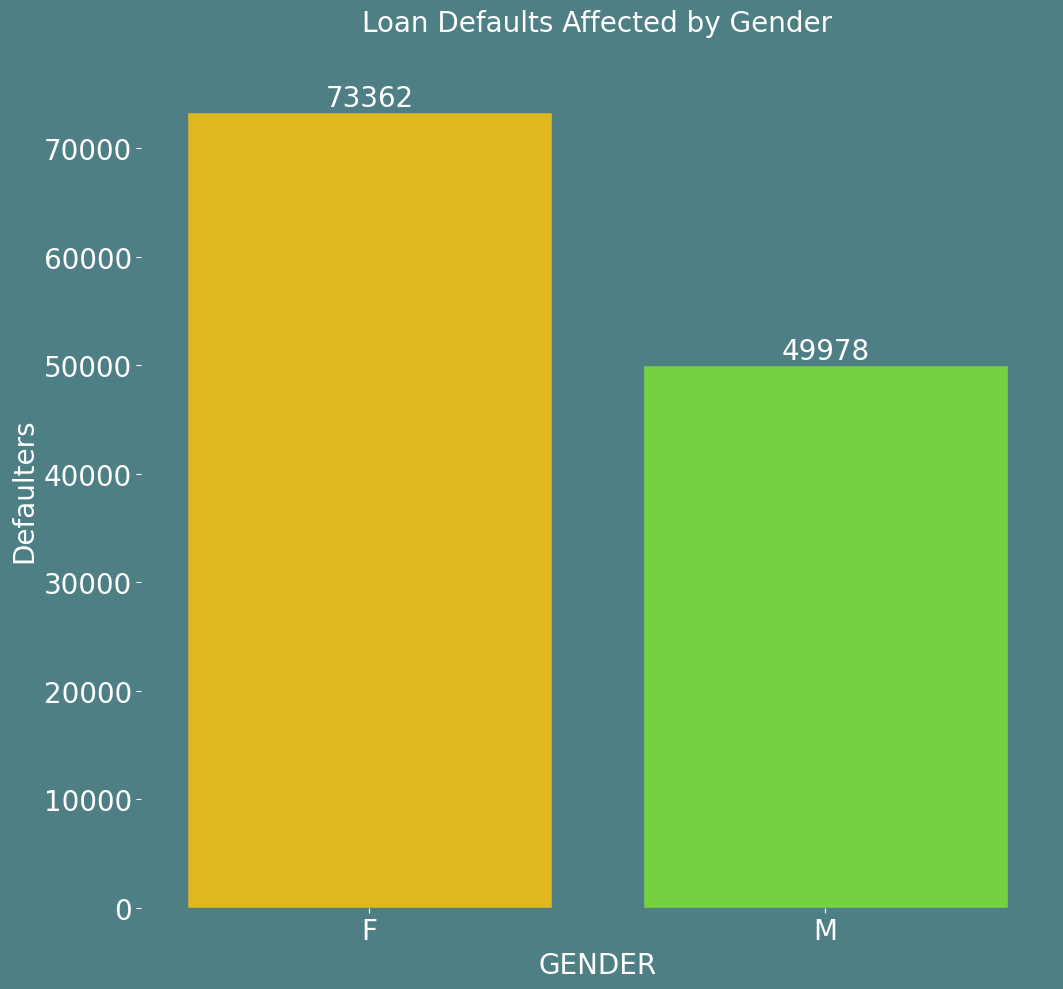

In [27]:
# Set the background color of the figure and the axes
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background 

# Filter/remove XNA from the data before plotting
filtered_data = default[default['CODE_GENDER'] != 'XNA']

# Calculate the counts of defaulters for each gender and sort in descending order
gender_counts = filtered_data['CODE_GENDER'].value_counts().sort_values(ascending=False)

# Create a dictionary mapping specific gender codes to their respective colors
color_map = {
    'F': '#ffca00',  # Gold color for 'F' (female)
    'M': '#71e827'   # Green color for 'M' (male)
}

# Create a list of colors based on the sorted gender counts
colors = [color_map[gender] for gender in gender_counts.index]

# Create a single subplot for the filtered data
ax = plt.subplot(1, 2, 1)  # Reference to the axes

# Plot the sorted data with no edges on the bars and custom colors
bars = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors, ax=ax, edgecolor='#4d7f85')  # Set edgecolor to match the background

# Set the background color of the axes to #4d7f85
ax.set_facecolor('#4d7f85')  # Set the internal background

# Title and labels with white color
ax.set_title('Loan Defaults Affected by Gender\n', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})
ax.set_xlabel("GENDER", color='white', fontsize=20)  # Set Gender on x-axis to white
ax.set_ylabel("Defaulters", color='white', fontsize=20)  # Set Count on y-axis to white

# Set x and y ticks color to white
ax.tick_params(axis='x', colors='white', labelsize=20)  # Set x-axis ticks to white
ax.tick_params(axis='y', colors='white', labelsize=20)  # Set y-axis ticks to white

# Adding number values on top of each bar
ax.bar_label(bars.containers[0], color='white', fontsize=20)  # Adding labels automatically

# Remove the black border by hiding the spines
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)

# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


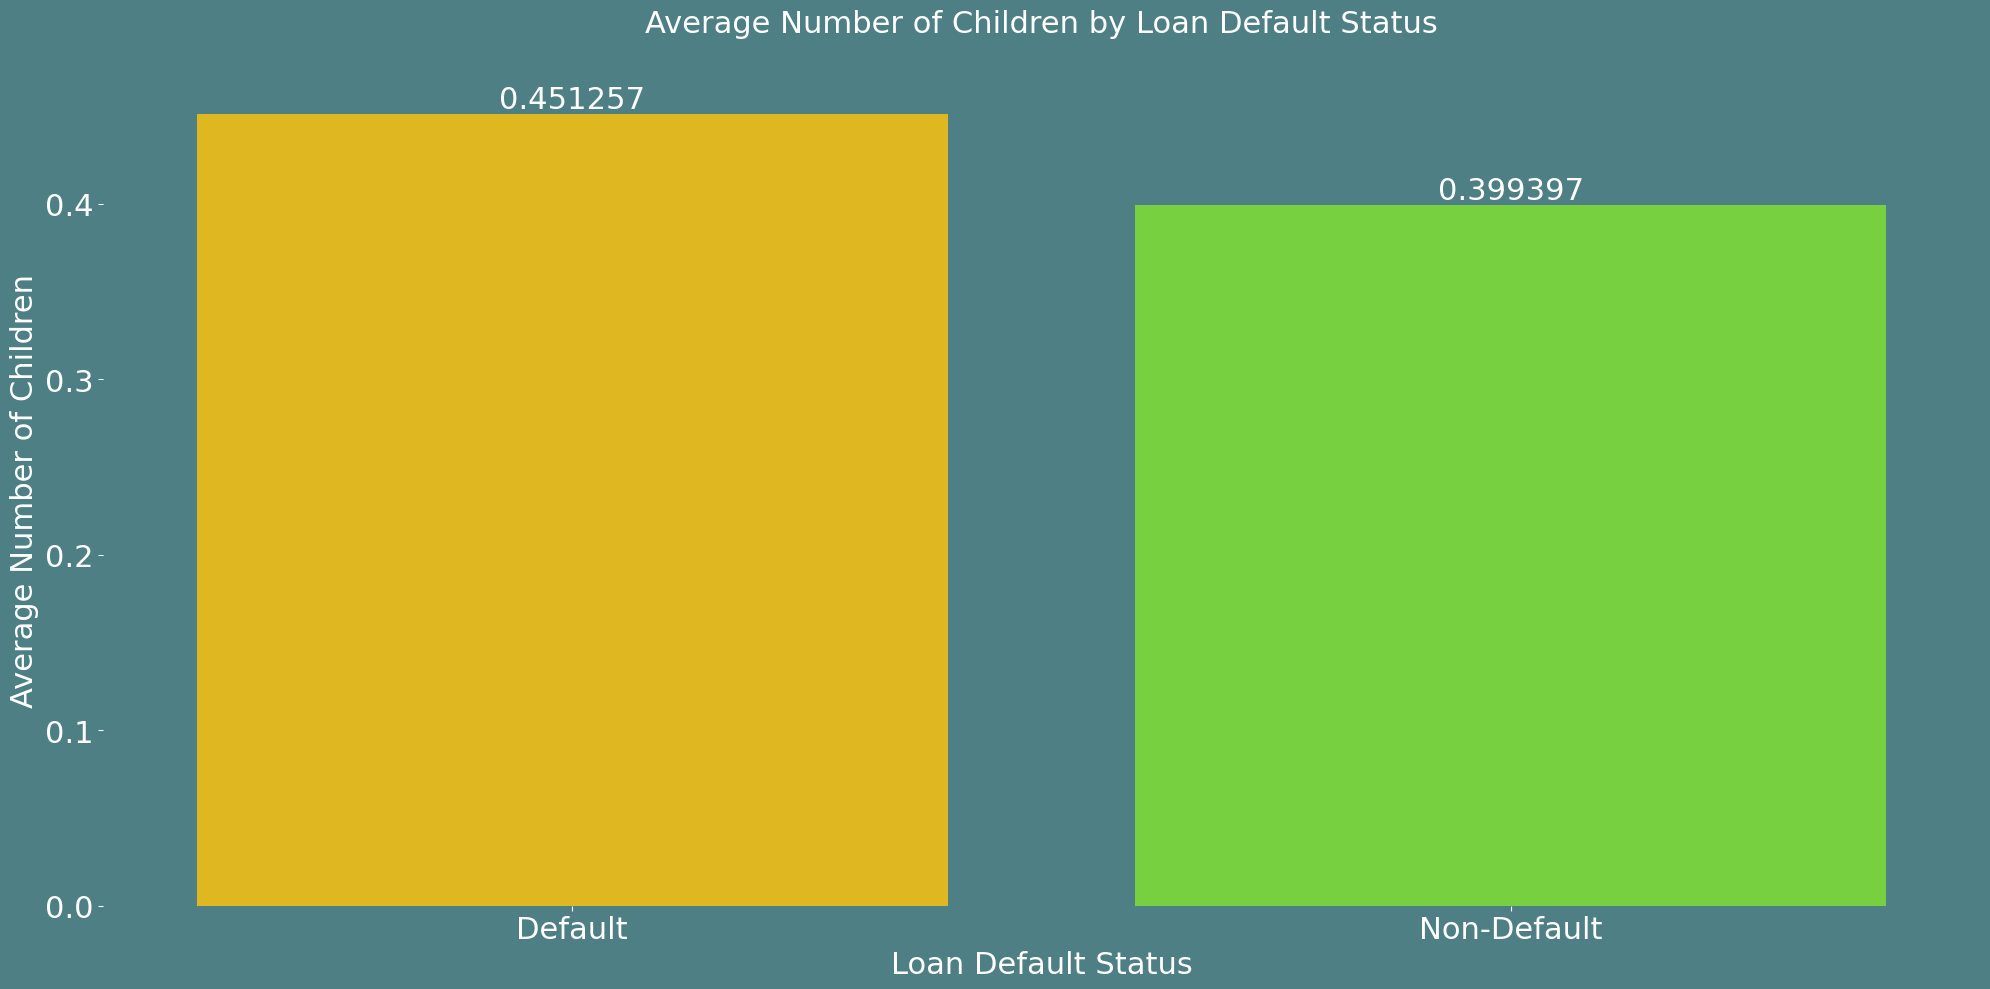

In [28]:
#Average Number of children by loan default status
# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background 

# Filter/remove out XNA from the data before plotting
filtered_data = m_a[m_a['CODE_GENDER'] != 'XNA']

# Calculate the average number of children grouped by TARGET
average_children = filtered_data.groupby('TARGET', as_index=False)['CNT_CHILDREN'].mean()

# Sort the values in descending order of average children
average_children = average_children.sort_values(by='CNT_CHILDREN', ascending=True)

# Create a dictionary mapping specific target values to their respective colors
color_map = {
    1: '#ffca00',  # Yellow color for 'Default'
    0: '#71e827'   # Green color for 'Non-Default'
}

# Reverse the order of the average_children for plotting
average_children['TARGET'] = average_children['TARGET'].replace({0: 1, 1: 0})

# Create a list of colors based on the sorted 'TARGET' values in average_children
colors = [color_map[target] for target in average_children['TARGET']]

# Create a bar chart with specified colors and no edges
ax = sns.barplot(x='TARGET', y='CNT_CHILDREN', data=average_children, palette=colors, errorbar=None, edgecolor='none')

# Set the background color of the axes to match the figure
ax.set_facecolor('#4d7f85')

# Title and labels with white color
plt.title('Average Number of Children by Loan Default Status\n', 
          fontdict={'fontsize': 22, 'fontweight': 5, 'color': 'white'})
plt.xlabel("Loan Default Status", color='white', fontsize=22)  # Set x-axis label
plt.ylabel("Average Number of Children", color='white', fontsize=22)  # Set y-axis label

# Set custom x-tick labels based on the reversed TARGET values
plt.xticks(ticks=[0, 1], labels=['Default', 'Non-Default'], color='white', fontsize=22)  # Flipped labels for x-axis

# Set x and y ticks color to white
ax.tick_params(axis='x', colors='white', labelsize=22)
ax.tick_params(axis='y', colors='white', labelsize=22)

# Adding values on top of the bars
ax.bar_label(ax.containers[0], color='white', fontsize=22)

# Remove the black border by hiding the spines
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)

# Use tight_layout to adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


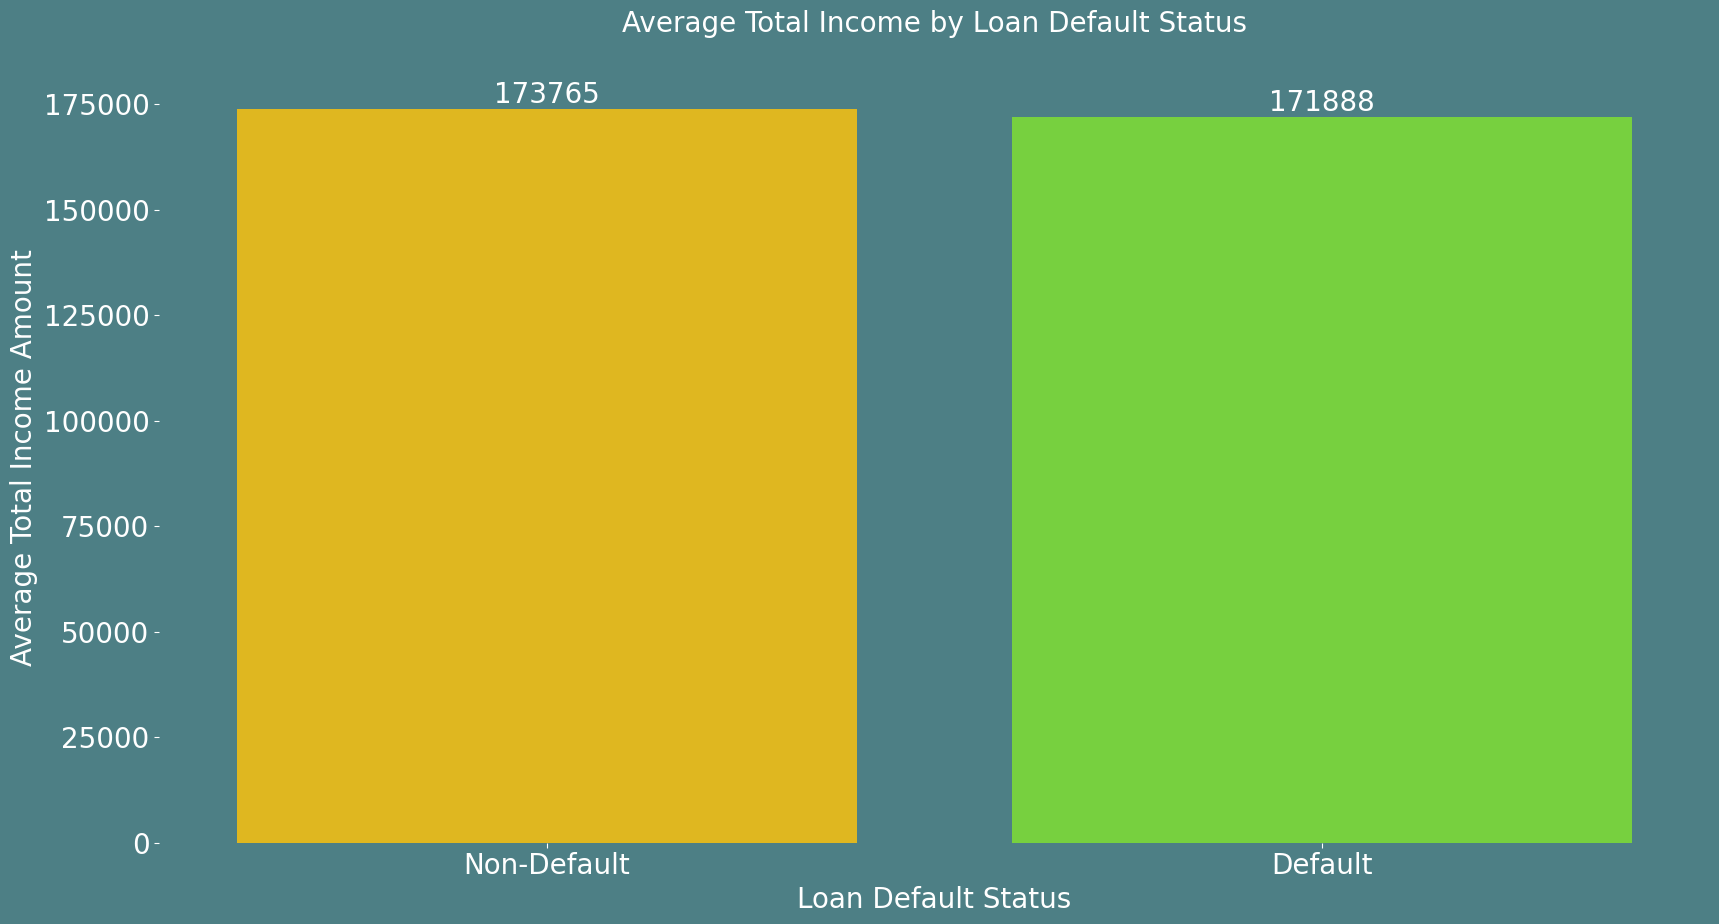

In [29]:
#Average Total Income by Loan Default Status

# Set the background color of the figure and the axes
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background 

# Filter/remove out XNA from the data before plotting
filtered_data = m_a[m_a['CODE_GENDER'] != 'XNA']

# Create a dictionary mapping specific loan default statuses to their respective colors
color_map = {
    1: '#ffca00',  # Gold color for 'Non-Default'
    0: '#71e827'   # Green color for 'Default'
}

# Create a list of colors based on the TARGET in the filtered_data
colors = [color_map[target] for target in filtered_data['TARGET']]

# Create a bar chart and save the axes to a variable with specified colors and no edges
ax = sns.barplot(x='TARGET', y='AMT_INCOME_TOTAL', data=filtered_data, palette=colors, errorbar=None, edgecolor='none')

# Set the background color of the axes to #4d7f85
ax.set_facecolor('#4d7f85')  # Set the internal background

# Title and labels with white color
plt.title('Average Total Income by Loan Default Status\n', 
          fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})
plt.xlabel("Loan Default Status", color='white',fontsize=20)  # Set x-axis label
plt.ylabel("Average Total Income Amount", color='white',fontsize=20)  # Set y-axis label

# Set custom x-tick labels
plt.xticks(ticks=[0, 1], labels=['Non-Default', 'Default'], color='white')  # Custom labels for x-axis

# Set x and y ticks color to white
ax.tick_params(axis='x', colors='white',labelsize=20)  # Set x-axis ticks to white
ax.tick_params(axis='y', colors='white',labelsize=20)  # Set y-axis ticks to white


# Adding values on top of the bars
ax.bar_label(ax.containers[0], color='white', fontsize=20)  # Adding labels automatically

# Remove the black border by hiding the spines
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)

# Show the plot
plt.show()


In [30]:
# 6. Bivariate analysis - Compares two variables to find relationships (e.g., age and income). 

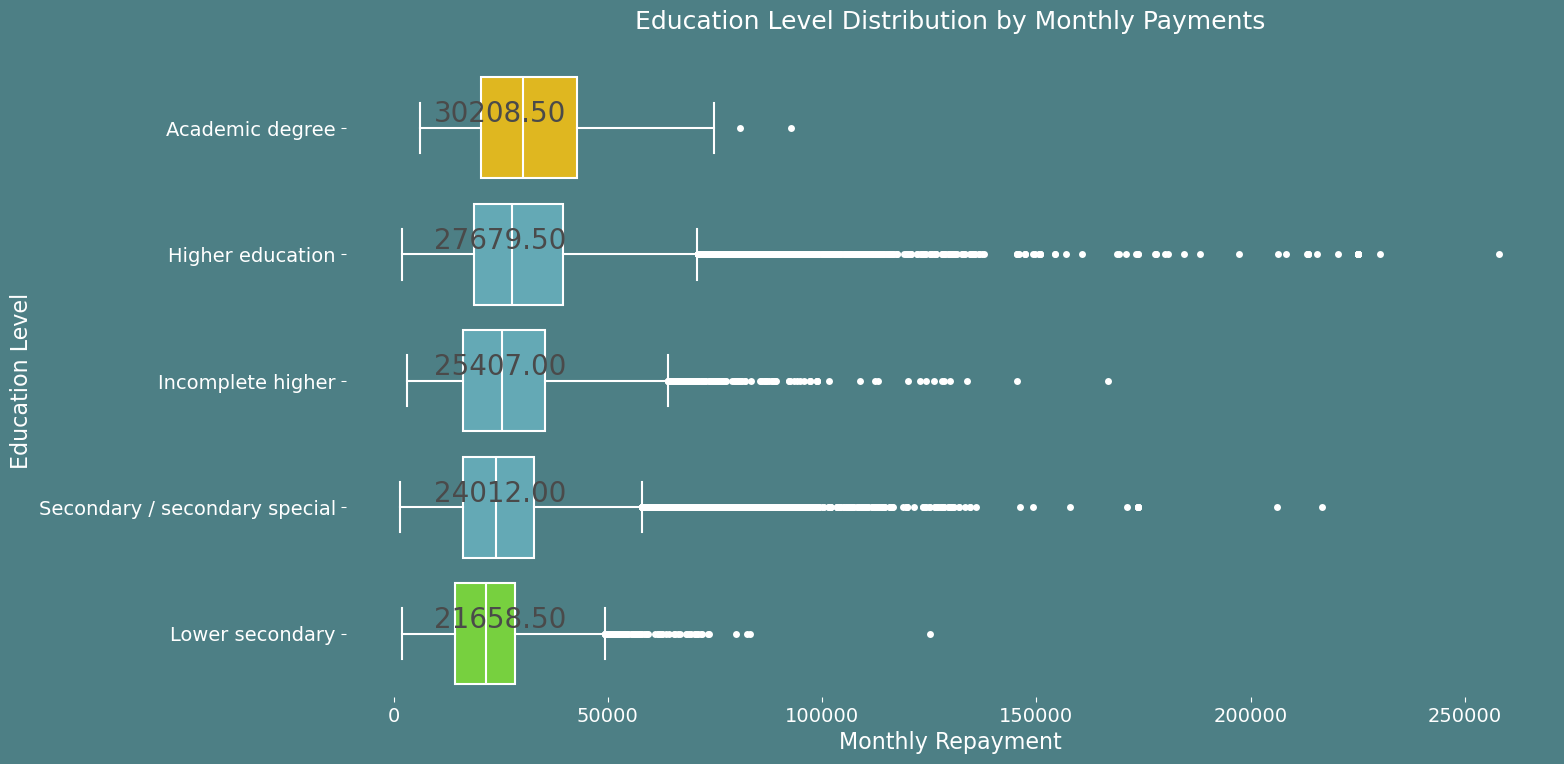

In [31]:
#Education level distribution by monthly payment
# Set the background color of the figure and the axes
plt.figure(figsize=[16, 8], facecolor='#4d7f85')  # Reduced figure size

# Calculate median values for AMT_ANNUITY grouped by NAME_EDUCATION_TYPE
median_values = c_a.groupby('NAME_EDUCATION_TYPE')['AMT_ANNUITY'].median()

# Define a color palette for the education types
color_mapping = {
    'Academic degree': '#ffca00',              # Gold
    'Lower secondary': '#71e827',              # Green
    'Higher education': '#57b2c2',             # Blue
    'Incomplete higher': '#57b2c2',            # Blue
    'Secondary / secondary special': '#57b2c2' # Blue
}

# Sort NAME_EDUCATION_TYPE by the median values in descending order
education_order = median_values.sort_values(ascending=False).index.tolist()

# Create a palette based on the defined color mapping
palette = [color_mapping[edu_type] for edu_type in education_order]

# Create the boxplot for AMT_ANNUITY by NAME_EDUCATION_TYPE with sorted order and remove outliers
ax = sns.boxplot(data=c_a, 
                 x='AMT_ANNUITY', 
                 y='NAME_EDUCATION_TYPE', 
                 palette=palette,  # Use the custom palette
                 order=education_order,  # Use the sorted order for education levels
                 showfliers=True,  # Show the outliers
                 flierprops=dict(marker='o', markerfacecolor='white', markeredgecolor='none', markersize=5, linestyle='none'),  # Set outliers to white with no edge
                 boxprops=dict(edgecolor='white'),       # Set edge color of boxes to white
                 whiskerprops=dict(color='white'),       # Set whisker color to white
                 capprops=dict(color='white'),           # Set caps (end lines) color to white
                 medianprops=dict(color='white'))        # Set median line color to white

# Set the background color of the axes to match the figure
ax.set_facecolor('#4d7f85')  # Set the internal background

# Remove the spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Title and labels with white color
ax.set_title('Education Level Distribution by Monthly Payments\n', 
             fontdict={'fontsize': 18, 'fontweight': 5, 'color': 'white'})

ax.set_xlabel("Monthly Repayment", color='white', fontsize=16)  # Set x-axis label
ax.set_ylabel("Education Level", color='white', fontsize=16)  # Set y-axis label

# Set x and y ticks color to white
ax.tick_params(axis='x', colors='white', labelsize=14)  # Set x-axis ticks to white
ax.tick_params(axis='y', colors='white', labelsize=14)  # Set y-axis ticks to white

# Add annotations for median values
for i, edu_type in enumerate(education_order):
    median_value = median_values[edu_type]
    ax.annotate(f'{median_value:.2f}', 
                xy=(c_a['AMT_ANNUITY'].median(), i),  # Adjust x and y position as necessary
                color='#4a4a4a',
                ha='center', 
                va='bottom', 
                fontsize=20)

# Use tight_layout to prevent overlap issues, with reduced padding
plt.tight_layout(pad=2)  # Added padding to avoid overlap

# Show the plot
plt.show()


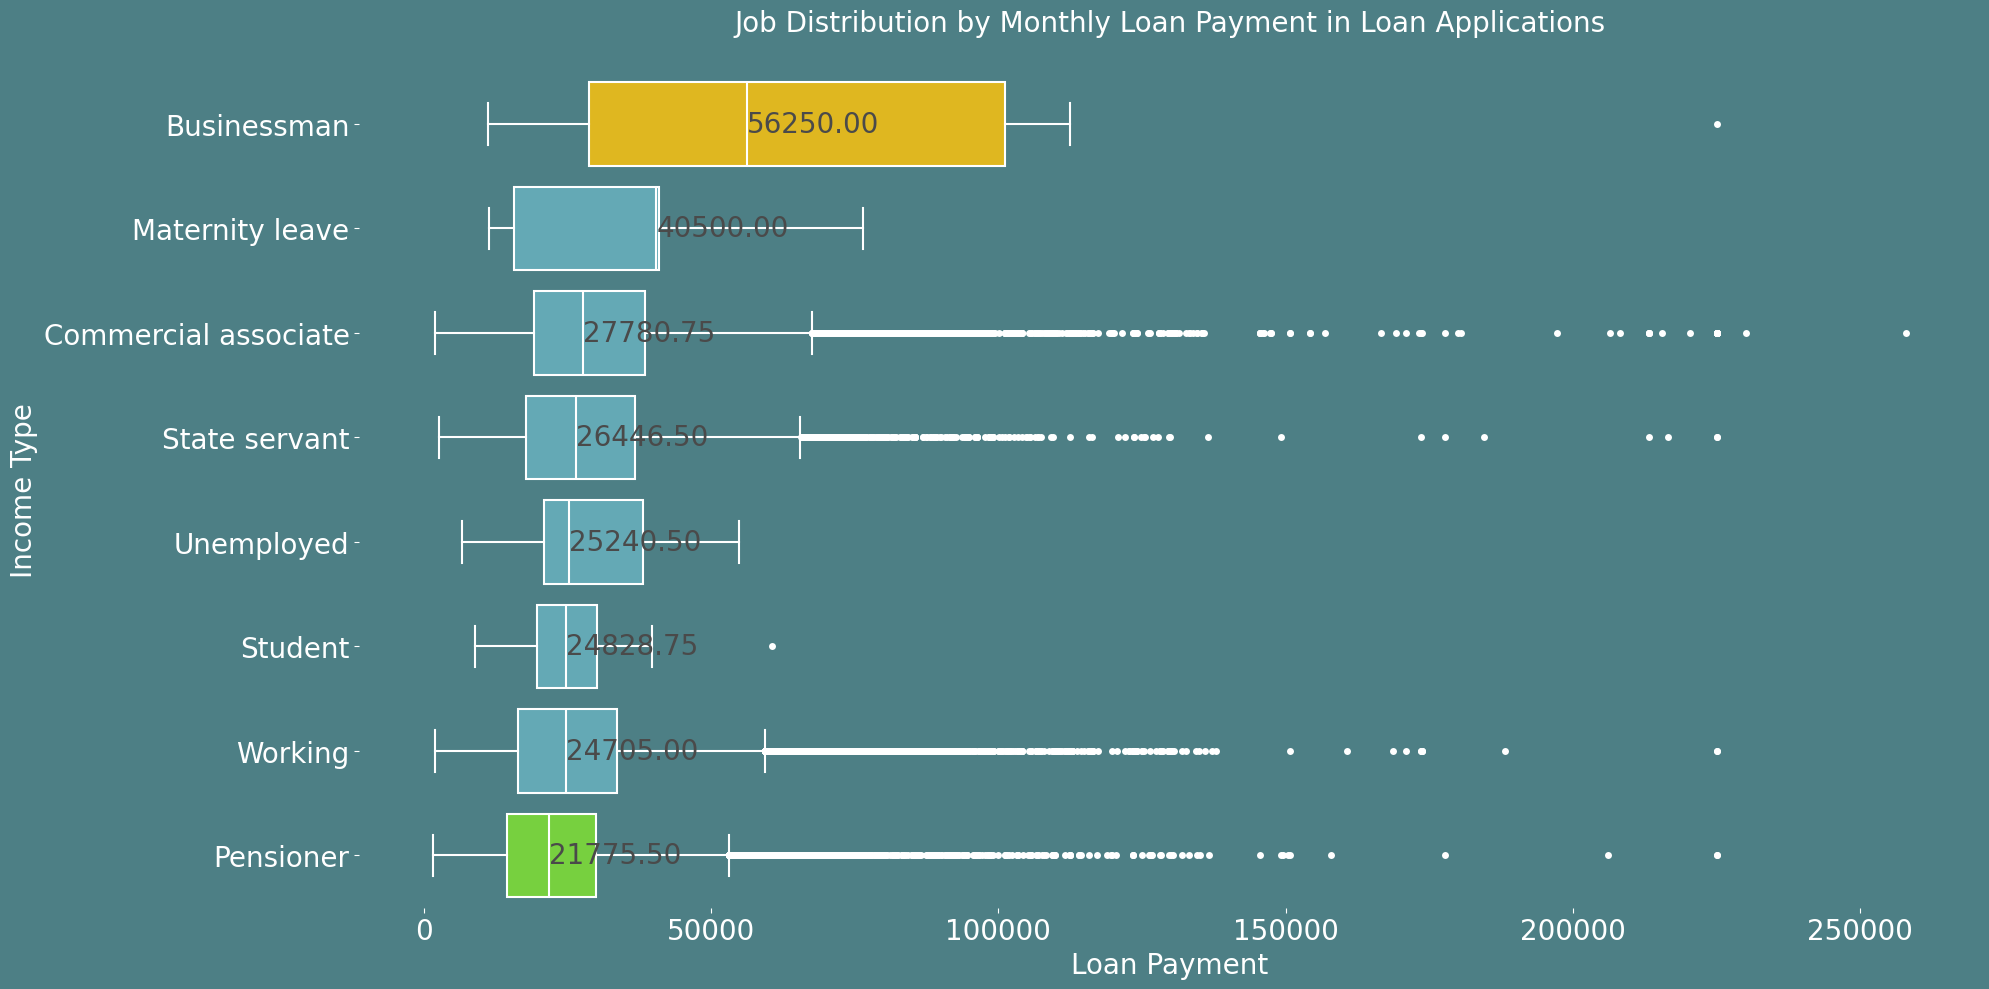

In [32]:
# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background 

# Calculate the median for each income type and sort them in descending order
medians = c_a.groupby('NAME_INCOME_TYPE')['AMT_ANNUITY'].median().sort_values(ascending=False)

# Define a color mapping for the income types
color_mapping = {
    'Businessman': '#ffca00',              # Gold for Businessman
    'Pensioner': '#71e827',                # Green for Pensioner
    'Maternity leave': '#57b2c2',          # Blue for Maternity leave
    'Commercial associate': '#57b2c2',     # Blue for Commercial associate
    'State servant': '#57b2c2',            # Blue for State servant
    'Unemployed': '#57b2c2',               # Blue for Unemployed
    'Student': '#57b2c2',                  # Blue for Student
    'Working': '#57b2c2'                   # Blue for Working
}

# Create the boxplot for AMT_ANNUITY by NAME_INCOME_TYPE with sorted order
ax = sns.boxplot(data=c_a, 
                 x='AMT_ANNUITY', 
                 y='NAME_INCOME_TYPE', 
                 order=medians.index, 
                 palette=color_mapping,  # Use the custom color mapping
                 showfliers=True,  # Show outliers
                 flierprops=dict(marker='o', markerfacecolor='white', markeredgecolor='none', markersize=5, linestyle='none'),  # Set outliers (dots) to white with no edge
                 boxprops=dict(edgecolor='white'),       # Set edge color of boxes to white
                 whiskerprops=dict(color='white'),       # Set whisker color to white
                 capprops=dict(color='white'),           # Set caps (end lines) color to white
                 medianprops=dict(color='white'))        # Set median line color to white

# Set the background color of the axes to match the figure
ax.set_facecolor('#4d7f85')  # Set the internal background

# Remove the spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Title and labels with white color
ax.set_title('Job Distribution by Monthly Loan Payment in Loan Applications\n', 
             fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})

ax.set_xlabel("Loan Payment", color='white', fontsize=20)  # Set x-axis label
ax.set_ylabel("Income Type", color='white', fontsize=20)  # Set y-axis label

# Set x and y ticks color to white
ax.tick_params(axis='x', colors='white', labelsize=20)  # Set x-axis ticks to white
ax.tick_params(axis='y', colors='white', labelsize=20)  # Set y-axis ticks to white

# Add annotations for the median values
for i, income_type in enumerate(medians.index):
    # Get the median value for the current income type
    median_val = medians[income_type]
    
    # Calculate the y-coordinate for the annotation (center of the box)
    y = i  # The y-coordinate corresponds to the position in the income type list

    # Annotate the median value on the plot
    ax.text(
        x=median_val,  # X-coordinate is the median value
        y=y,  # Y-coordinate is the position of the income type
        s=f'{median_val:.2f}',  # Annotated text with 2 decimal places
        va='center',  # Vertically aligned to the center of the box
        ha='left',  # Horizontally aligned slightly to the left of the median
        color='#4a4a4a',  # White text color
        fontsize=20  # Font size for the annotation
    )

# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

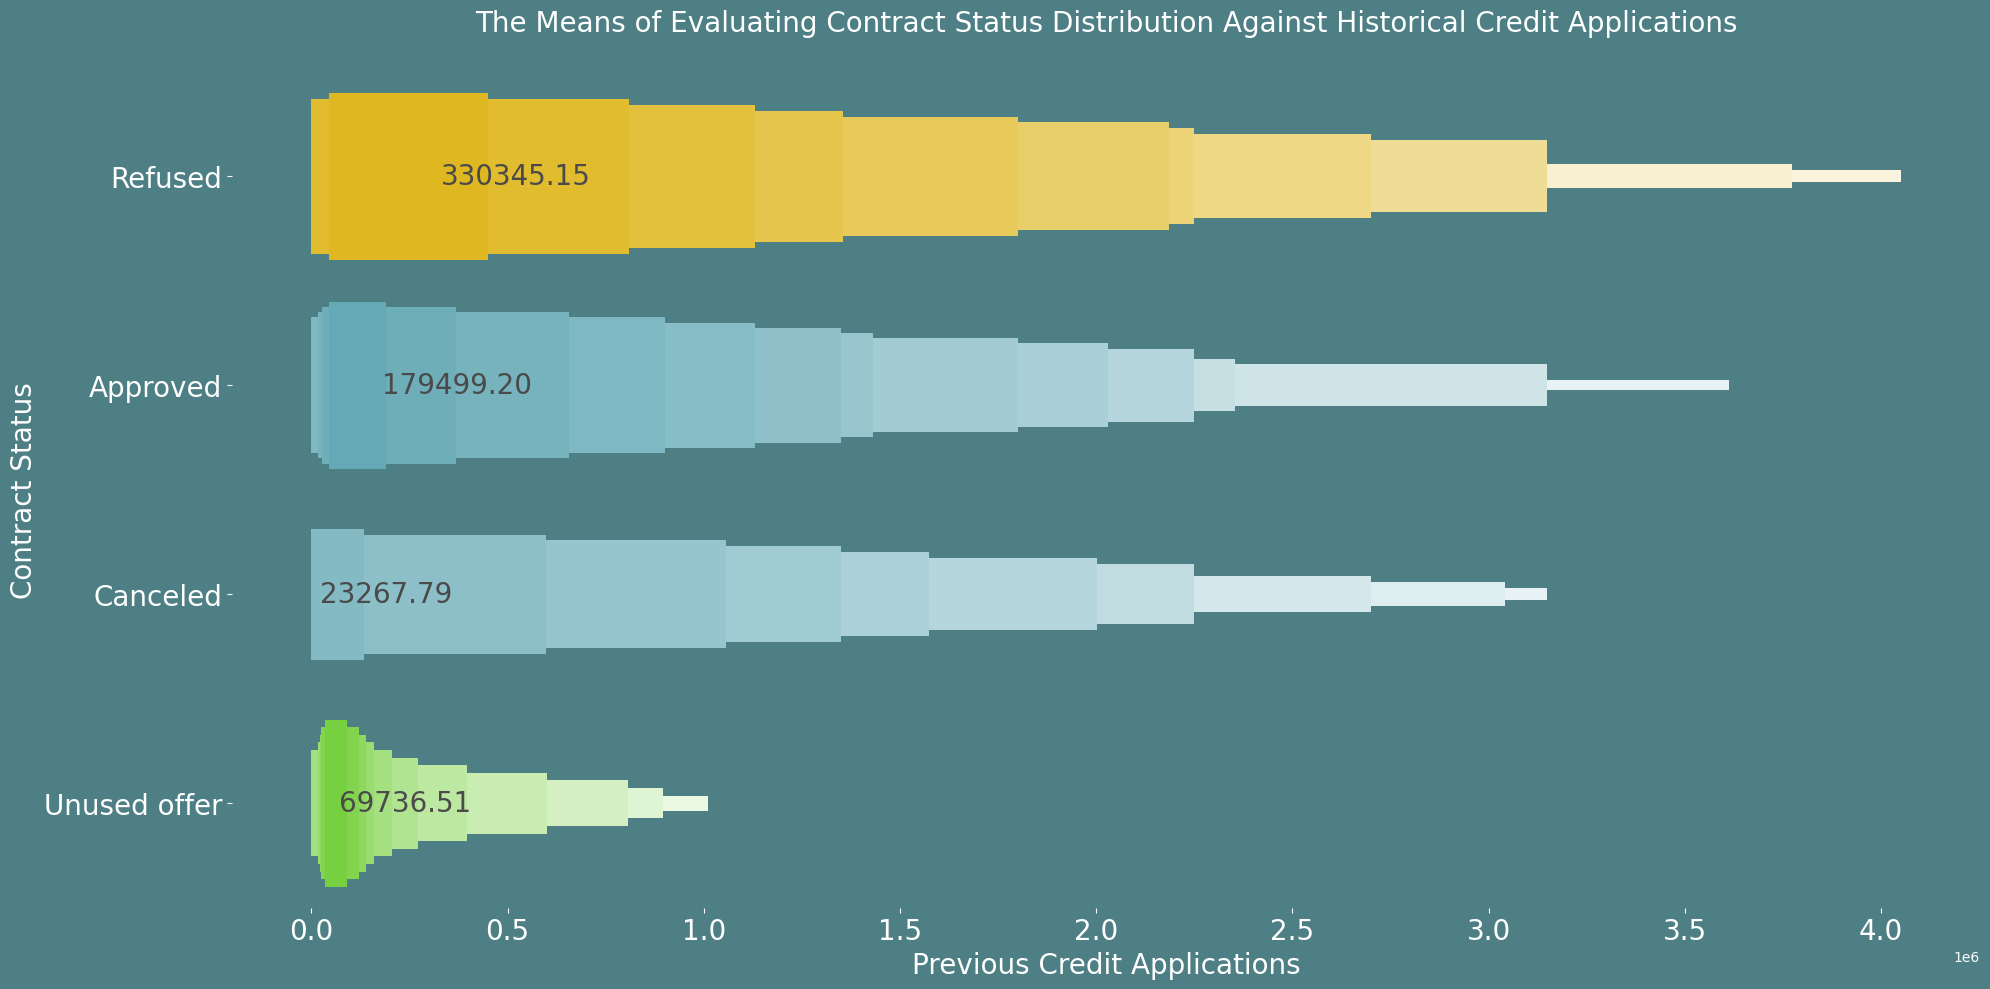

In [33]:
#Contract and credit application
# Replace infinite values with NaN in the relevant column
m_a['AMT_APPLICATION'] = m_a['AMT_APPLICATION'].replace([np.inf, -np.inf], np.nan)

# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background

# Define a custom order for contract statuses
contract_order = ["Refused", "Approved", "Canceled", "Unused offer"]

# Remove any NaN values from NAME_CONTRACT_STATUS and get unique statuses
m_a_clean = m_a[m_a['NAME_CONTRACT_STATUS'].notna()]  # Remove NaN values
remaining_contracts = m_a_clean['NAME_CONTRACT_STATUS'].unique()

# Filter out the statuses that are in the contract_order
remaining_contracts = [status for status in remaining_contracts if status not in contract_order]

# Extend the custom order with any remaining statuses sorted by median
# First, calculate the median values and filter out any NaN statuses
median_values = m_a_clean.groupby('NAME_CONTRACT_STATUS')['AMT_APPLICATION'].median()
median_values = median_values[median_values.index.isin(remaining_contracts)]  # Only keep valid contracts
contract_order.extend(median_values.sort_values(ascending=False).index.tolist())

# Create a color mapping based on the sorted contract statuses
color_mapping = {
    contract_order[0]: '#ffca00',  # Highest median (Refused)
    'Approved': '#57b2c2',        # Change Approved color
    'Unused offer': '#71e827',    # Change Unused offer color
}

# Assign the middle color to all other statuses
colors = [color_mapping.get(contract, '#57b2c2') for contract in contract_order]  # Default to Approved color for others

# Create a boxen plot for AMT_APPLICATION by NAME_CONTRACT_STATUS
ax = sns.boxenplot(data=m_a_clean,  # Use the cleaned DataFrame
               x='AMT_APPLICATION', 
               y='NAME_CONTRACT_STATUS', 
               palette=colors,  # Use the custom colors
               order=contract_order, 
               scale='linear',  # Change this to 'exponential' if you want a different scaling effect
               linewidth=0,  # Set linewidth to 0 to remove edge color
               showfliers=False)  # Disable showing the outliers (black dots)

# Set the background color of the axes
plt.gca().set_facecolor('#4d7f85')  # Set the internal background

# Title and labels with white color
plt.title('The Means of Evaluating Contract Status Distribution Against Historical Credit Applications\n', 
          fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})

plt.xlabel("Previous Credit Applications", color='white', fontsize=20)  # Set x-axis label
plt.ylabel("Contract Status", color='white', fontsize=20)  # Set y-axis label

# Set x and y ticks color to white
plt.tick_params(axis='x', colors='white', labelsize=20)  # Set x-axis ticks to white
plt.tick_params(axis='y', colors='white', labelsize=20)  # Set y-axis ticks to white

# Remove the black border by hiding the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add annotations for the median of AMT_APPLICATION for each contract status
medians = m_a_clean.groupby('NAME_CONTRACT_STATUS')['AMT_APPLICATION'].mean()

for i, status in enumerate(contract_order):
    median_val = medians[status] if status in medians.index else None
    if median_val is not None:
        ax.annotate(f'{median_val:.2f}',  # Format the median value to 2 decimal places
                    xy=(median_val, i),  # Position based on median value and status index
                    xytext=(0, 10),  # Offset the text slightly above the box
                    textcoords='offset points',
                    ha='left', va='top',  # Horizontal and vertical alignment
                    color='#4a4a4a',  # Set the text color to white for visibility
                    fontsize=20)  # Adjust the font size

# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/v0/cdq_7tz578d0rt80jghl9ngh0000gn/T/ipykernel_2191/1441728859.py:27: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=m_a_filtered,
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


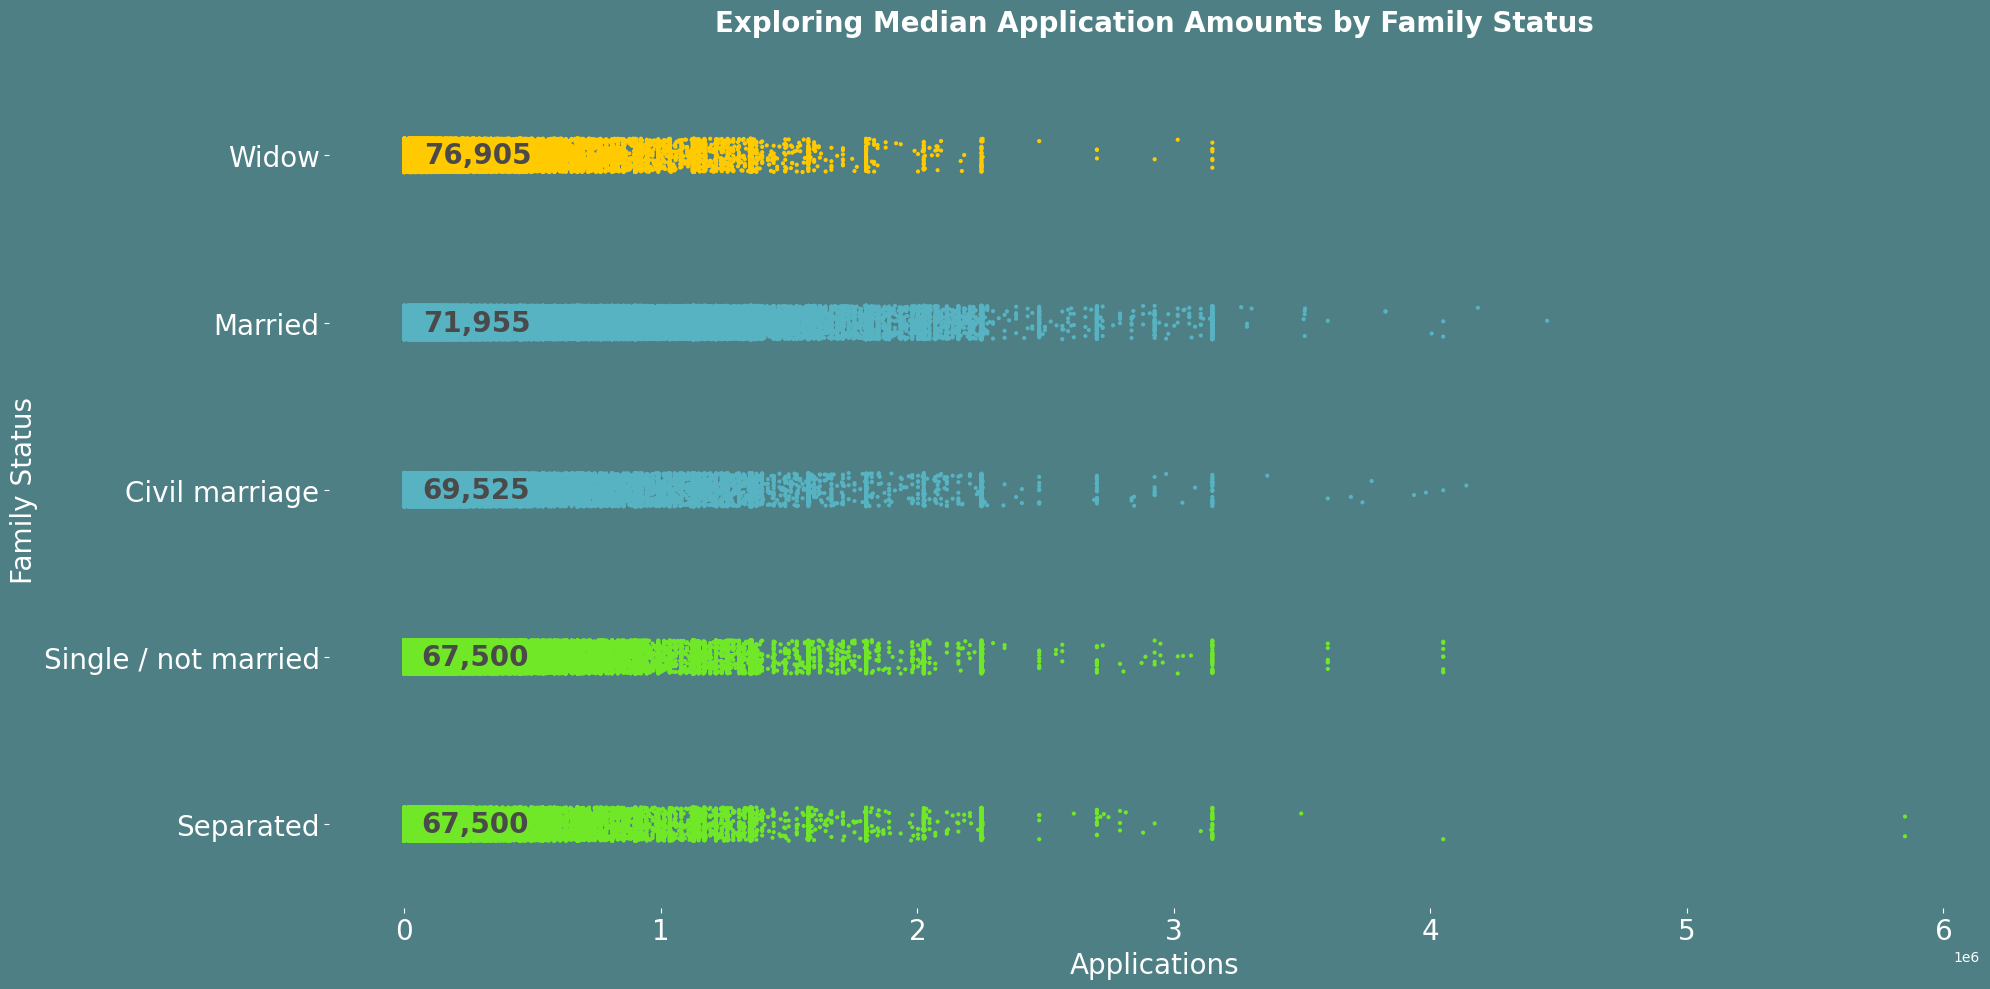

In [34]:
# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background 

# Filter out entries where NAME_FAMILY_STATUS is 'Unknown'
m_a_filtered = m_a[m_a['NAME_FAMILY_STATUS'] != 'Unknown']

# Define a custom order for family statuses
contract_order = [
    
    "Widow",
    "Married", 
    "Civil marriage", 
    "Single / not married", 
    "Separated"
]

# Create a color mapping for each family status
color_mapping = {
    "Married": "#57b2c2",        # Blue
    "Civil marriage": "#57b2c2",  # Blue
    "Single / not married": "#71e827",  # green
    "Separated": "#71e827",      # Green
    "Widow": "#ffca00"           # yellow
}

# Create a scatter plot for AMT_APPLICATION by NAME_FAMILY_STATUS
sns.stripplot(data=m_a_filtered, 
              x='AMT_APPLICATION', 
              y='NAME_FAMILY_STATUS', 
              palette=color_mapping,  # Use the color mapping
              order=contract_order,  # Ensure categories are sorted in specified order
              jitter=True,  # Add some jitter for better visibility
              size=3)  # Set the size of the points

# Set the background color of the axes
plt.gca().set_facecolor('#4d7f85')  # Set the internal background

# Title and labels with white color
plt.title('Exploring Median Application Amounts by Family Status\n', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'white'})

plt.xlabel("Applications", color='white', fontsize=20)  # Set x-axis label
plt.ylabel("Family Status", color='white', fontsize=20)  # Set y-axis label

# Set x and y ticks color to white
plt.tick_params(axis='x', colors='white', labelsize=20)  # Set x-axis ticks to white
plt.tick_params(axis='y', colors='white', labelsize=20)  # Set y-axis ticks to white

# Remove the black border by hiding the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Calculate the median application amount for each family status
medians = m_a_filtered.groupby('NAME_FAMILY_STATUS')['AMT_APPLICATION'].median()

# Annotate the median for each family status
for i, family_status in enumerate(contract_order):
    median_val = medians[family_status]
    plt.text(median_val, i, f'{median_val:,.0f}',  # Format the median value to remove decimals
             verticalalignment='center', size=20, color='#4a4a4a', weight='semibold')

# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


Unique Family Statuses: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']


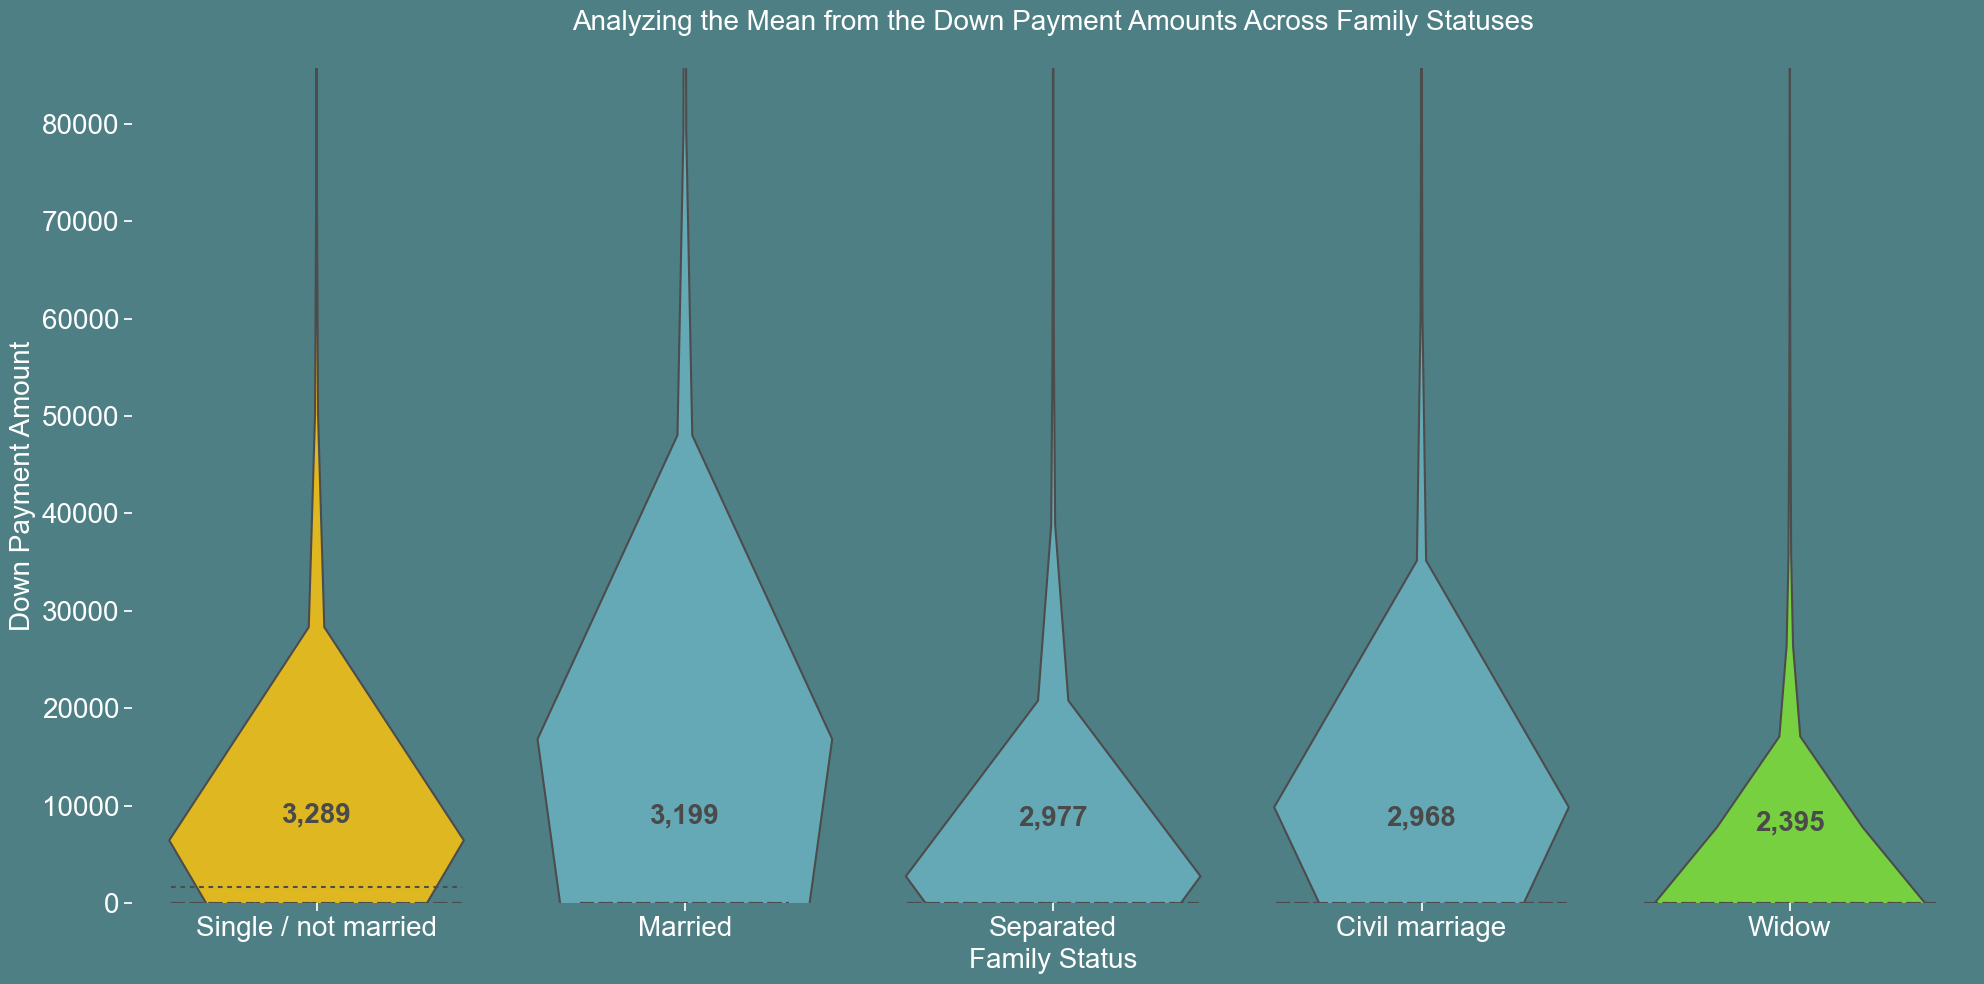

In [35]:
#downpayment and family status
# Set the Seaborn theme
sns.set_theme(style="ticks")  # Choose your preferred style

# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background 

# Remove/Filter out the "unknown" family status
m_a_filtered = m_a[m_a['NAME_FAMILY_STATUS'] != 'Unknown'].copy()  # Use .copy() to avoid warning

# Print unique values in NAME_FAMILY_STATUS to debug
print("Unique Family Statuses:", m_a_filtered['NAME_FAMILY_STATUS'].unique())

# Sort NAME_FAMILY_STATUS by the median AMT_DOWN_PAYMENT in ascending order
contract_order = ['Single / not married','Married','Separated', 'Civil marriage', 'Widow']

# Create a color mapping based on NAME_FAMILY_STATUS
color_mapping = {
    "Married": "#57b2c2",  # Color for Married
    "Widow": "#71e827",    # Color for Widow
    "Civil marriage": "#57b2c2",  # Color for Civil marriage
    "Separated": "#57b2c2",  # Color for Separated Family Status
    "Single / not married": "#ffca00"  # Color for Single/not married
}

# Use .loc to assign colors without warning
m_a_filtered.loc[:, 'color'] = m_a_filtered['NAME_FAMILY_STATUS'].map(color_mapping)

# Create a list of colors for the palette, using a fallback color for any unknown statuses
palette = []
for status in contract_order:
    if status in color_mapping:
        palette.append(color_mapping[status])
    else:
        palette.append("#cccccc")  # Fallback color for unknown statuses

# Create a violin plot for AMT_DOWN_PAYMENT by NAME_FAMILY_STATUS
ax = sns.violinplot(
    data=m_a_filtered,
    x='NAME_FAMILY_STATUS',
    y='AMT_DOWN_PAYMENT',
    order=contract_order,  # Use the specified order
    palette=palette,  # Use the constructed palette
    inner='quartile',  # Display quartiles inside the violin plot
    edgecolor='white',  # Change the edge color of the violins to white
    scale='width',  # Scale violins to width
    bw=0.5  # Adjust bandwidth to increase the width of the violins
)

# Set the background color of the figure
ax.set_facecolor('#4d7f85')  # Set the internal background of the axes

# Title and labels with white color
ax.set_title('Analyzing the Mean from the Down Payment Amounts Across Family Statuses\n', 
          fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'white'})

ax.set_xlabel("Family Status", color='white', fontsize=20)  # Set x-axis label
ax.set_ylabel("Down Payment Amount", color='white', fontsize=20)  # Set y-axis label

# Set x and y ticks color to white
ax.tick_params(axis='x', colors='white', labelsize=20)  # Set x-axis ticks to white
ax.tick_params(axis='y', colors='white', labelsize=20)  # Set y-axis ticks to white

# Remove the black border by hiding the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Calculate the mean down payment amount for each family status
means = m_a_filtered.groupby('NAME_FAMILY_STATUS')['AMT_DOWN_PAYMENT'].mean()

# Annotate the means for each family status without the word "Mean"
for i, family_status in enumerate(contract_order):
    mean_val = means[family_status]
    ax.text(x=i, y=mean_val + 5000,  # Adjust the vertical position above the mean
            s=f'{mean_val:,.0f}',  # Format the mean value without "Mean"
            color='#4a4a4a', size=20, weight='semibold', ha='center')  # Horizontal alignment to center

# Adjust the y-axis limits to increase the length of the violins
plt.ylim(0, m_a_filtered['AMT_DOWN_PAYMENT'].max() * 0.028)  # Adjust this value as needed

# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


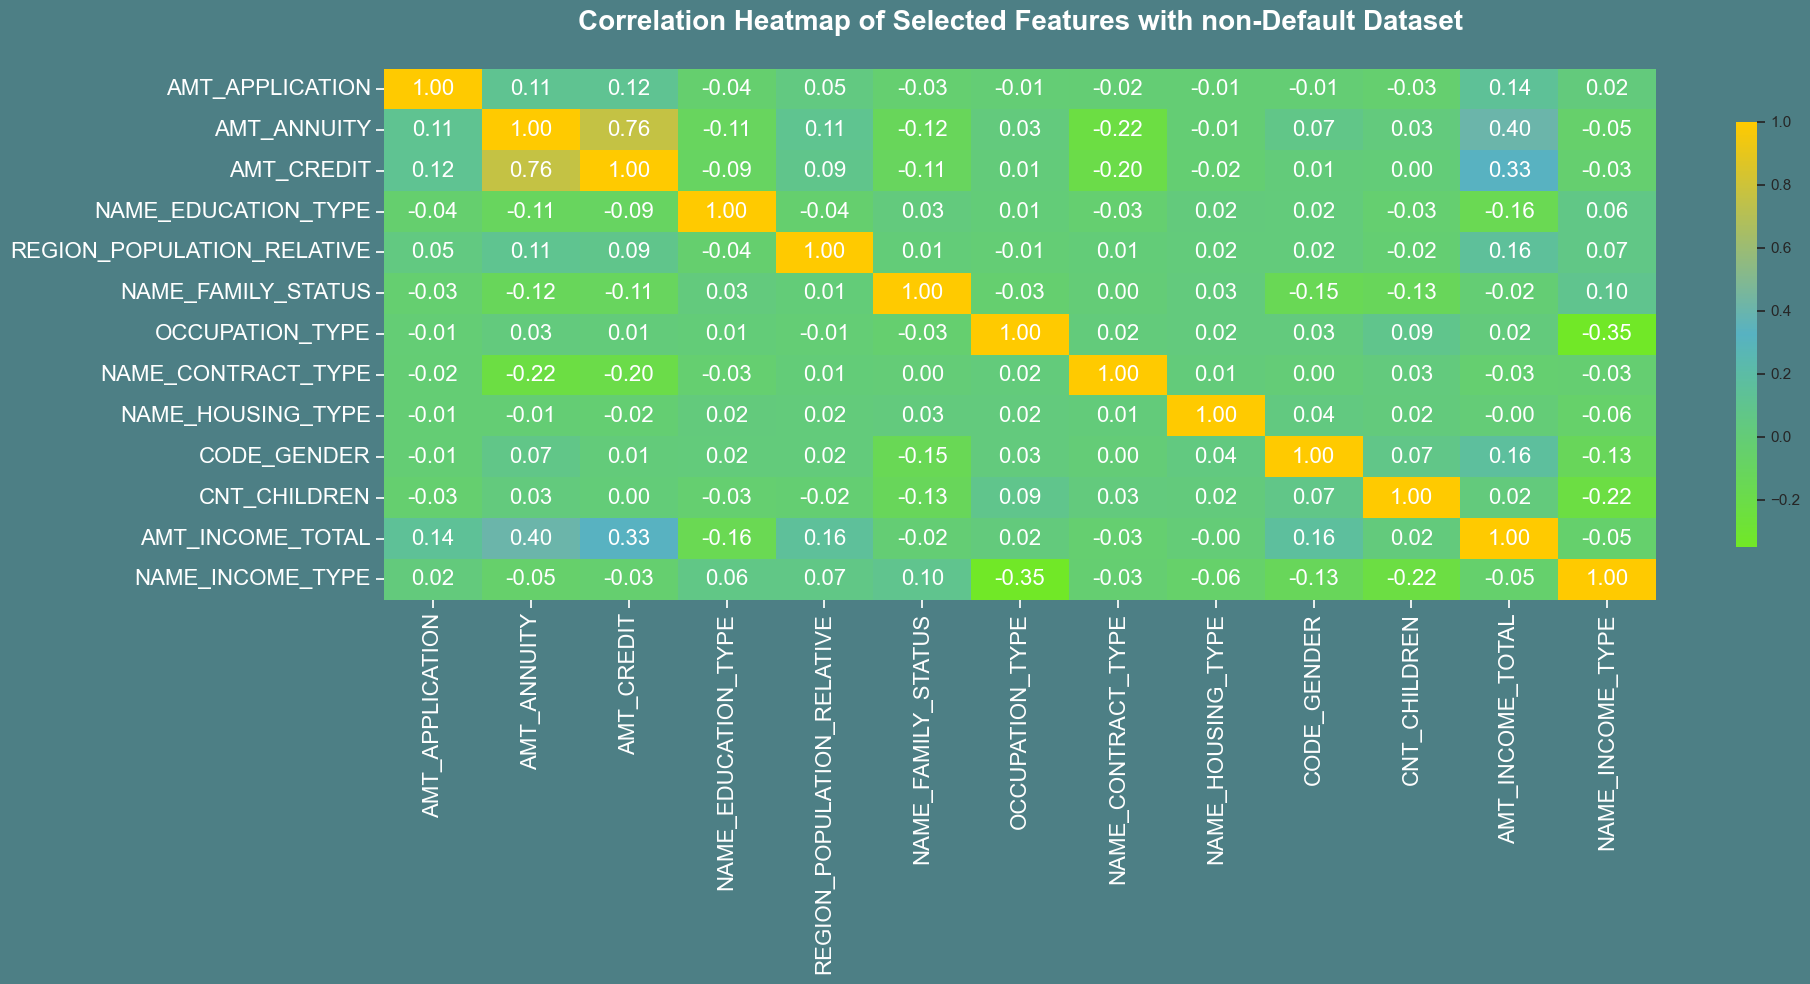

In [36]:
#Correlation Heatmap of Selected Features with non-Default Dataset

# Sample DataFrame - non default dataset

# Select the relevant columns
columns_of_interest = [
    'AMT_APPLICATION', 'AMT_ANNUITY', 'AMT_CREDIT', 
    'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 
    'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 
    'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 
    'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
    'NAME_INCOME_TYPE'
]

# Ensure all columns exist
existing_columns = [col for col in columns_of_interest if col in m_a.columns]

# Ensure that categorical variables are encoded numerically for correlation analysis
nd_encoded = non_default.copy()

# List of categorical columns to encode
categorical_columns = [
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 
    'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'CODE_GENDER', 
    'NAME_INCOME_TYPE'
]

# Encode categorical variables using apply and lambda without a for loop
nd_encoded[categorical_columns] = nd_encoded[categorical_columns].apply(lambda col: pd.factorize(col)[0])

# Create the correlation matrix only with existing numeric columns
correlation_matrix = nd_encoded[existing_columns].corr()

# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background 

# Define custom colors
colors = ['#71e827', '#57b2c2', '#ffca00']  # Lowest, rest, highest
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create the heatmap with a gradient color map
heatmap = sns.heatmap(correlation_matrix, 
                      cmap=custom_cmap,  # Use the custom color map
                      linewidths=0,  # Remove the white line
                      cbar_kws={"shrink": .8}, 
                      mask=correlation_matrix.isnull(),  # Mask any NaN values if they exist
                      cbar=True)  # Show color bar

# Add annotations manually
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j + 0.5, i + 0.5, 
                 f"{correlation_matrix.iloc[i, j]:.2f}", 
                 ha='center', va='center', 
                 color='white', fontsize=16)

# Set the background color of the axes to black
plt.gca().set_facecolor('#4d7f85')  # Set the internal background

# Title and labels with white color
plt.title('Correlation Heatmap of Selected Features with non-Default Dataset\n', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'white'})

# Set x and y ticks color to white
plt.tick_params(axis='x', colors='white',labelsize=16)  # Set x-axis ticks to white
plt.tick_params(axis='y', colors='white',labelsize=16)  # Set y-axis ticks to white

# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()



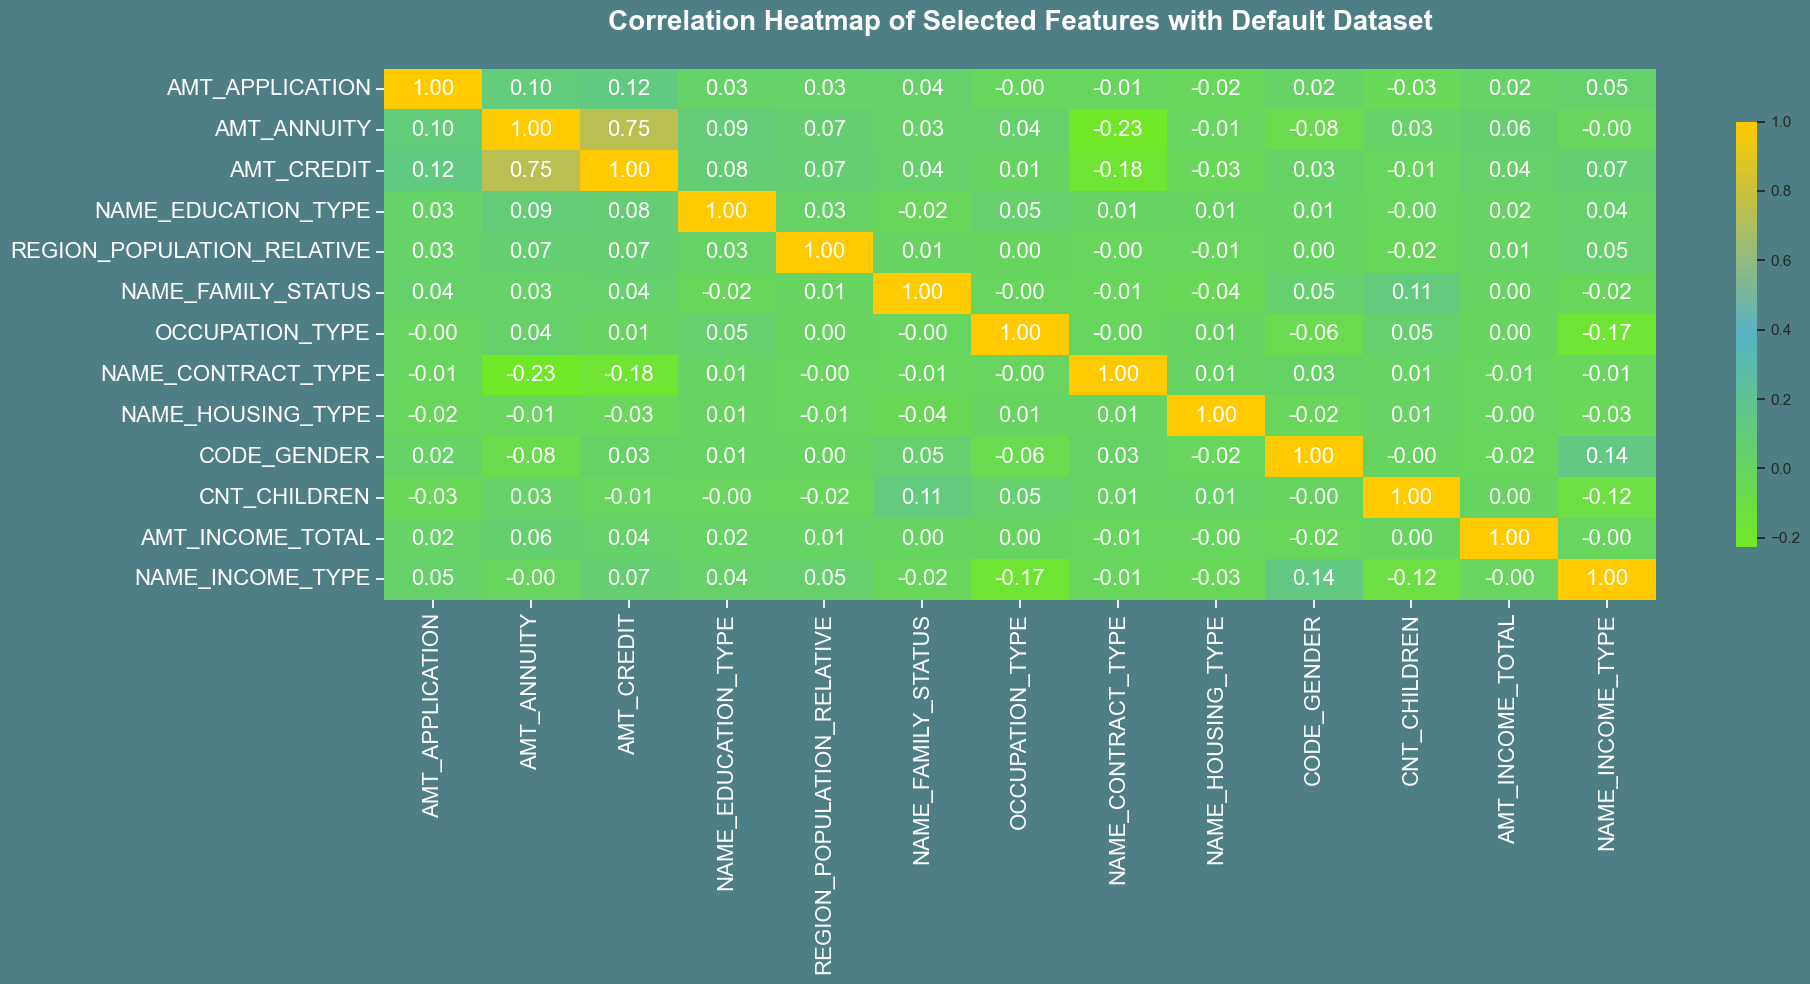

In [37]:
#Correlation Heatmap of Selected Features with Default Dataset
# Sample DataFrame - default dataset

# Select the relevant columns
columns_of_interest = [
    'AMT_APPLICATION', 'AMT_ANNUITY', 'AMT_CREDIT', 
    'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 
    'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 
    'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 
    'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
    'NAME_INCOME_TYPE'
]

# Ensure all columns exist
existing_columns = [col for col in columns_of_interest if col in m_a.columns]

# Create a copy of the default DataFrame for encoding
d_encoded = default.copy()

# List of categorical columns to encode
categorical_columns = [
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 
    'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'CODE_GENDER', 
    'NAME_INCOME_TYPE'
]

# Encode categorical variables using apply and lambda without a for loop
for col in categorical_columns:
    d_encoded[col] = pd.factorize(d_encoded[col])[0]

# Create the correlation matrix only with existing numeric columns
correlation_matrix = d_encoded[existing_columns].corr()

# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background 

# Define custom colors
colors = ['#71e827', '#57b2c2', '#ffca00']  # Lowest, rest, highest
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create the heatmap with a gradient color map
heatmap = sns.heatmap(correlation_matrix, 
                      cmap=custom_cmap,  # Use the custom color map
                      linewidths=0,  # Remove the white line
                      cbar_kws={"shrink": .8}, 
                      mask=correlation_matrix.isnull(),  # Mask any NaN values if they exist
                      cbar=True)  # Show color bar

# Add annotations manually
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j + 0.5, i + 0.5, 
                 f"{correlation_matrix.iloc[i, j]:.2f}", 
                 ha='center', va='center', 
                 color='white', fontsize=16)

# Set the background color of the axes to black
plt.gca().set_facecolor('#4d7f85')  # Set the internal background

# Title and labels with white color
plt.title('Correlation Heatmap of Selected Features with Default Dataset\n', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'white'})

# Set x and y ticks color to white
plt.tick_params(axis='x', colors='white',labelsize=16)  # Set x-axis ticks to white
plt.tick_params(axis='y', colors='white',labelsize=16)  # Set y-axis ticks to white

# Use tight_layout to center and adjust plot margins
plt.tight_layout()

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2000x1000 with 0 Axes>

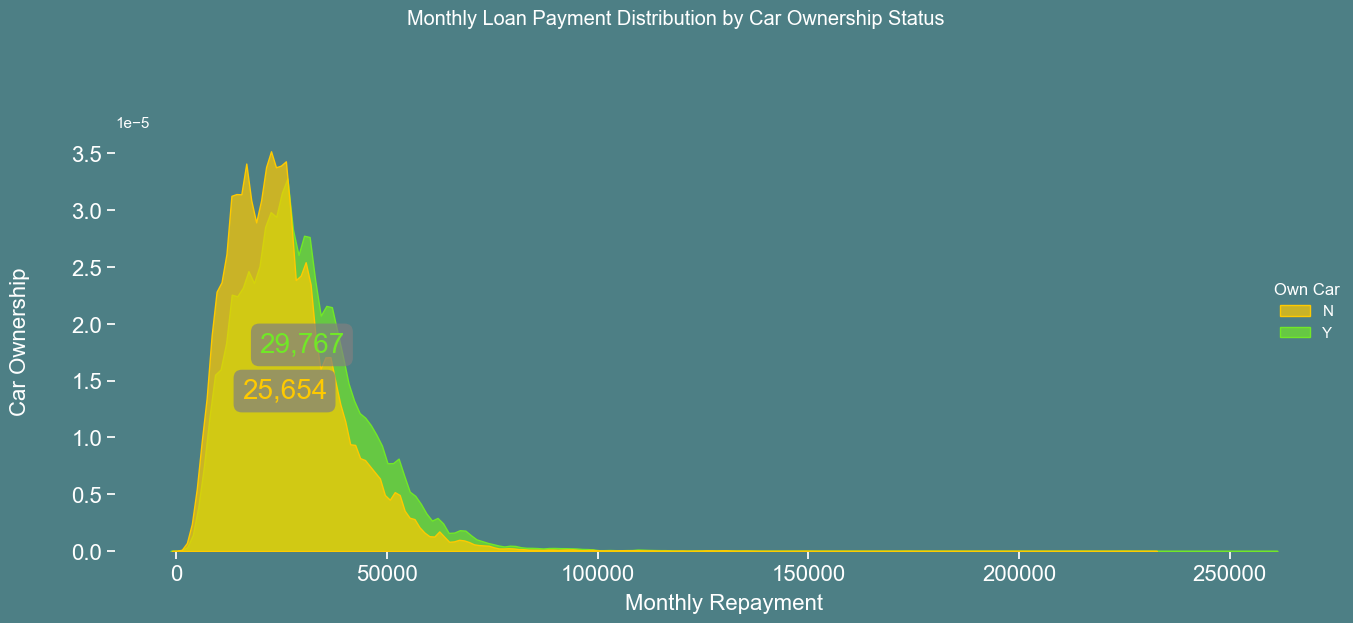

In [38]:
#Loan payment - car ownership
# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background

# Set the Seaborn theme
sns.set_theme(style="ticks")  # Choose your preferred style

# Define a custom color palette for FLAG_OWN_CAR
custom_palette = {'N': '#ffca00', 'Y': '#71e827'}

# Create a displot for AMT_ANNUITY
displot = sns.displot(
    data=m_a,
    x='AMT_ANNUITY',
    hue='FLAG_OWN_CAR',  # Color by car ownership
    kind='kde',  # Kernel density estimate
    height=6,  # Height of the figure
    aspect=2,  # Aspect ratio
    fill=True,  # Fill the area under the curve
    palette=custom_palette,  # Apply the custom palette
    alpha=0.7,  # Transparency of the fill
    common_norm=False  # Normalize the KDE separately for each hue
)

# Set the background color of the figure and axes
displot.fig.set_facecolor('#4d7f85')  # Set the exterior background
for ax in displot.axes.flatten():
    ax.set_facecolor('#4d7f85')  # Set the internal background of the axes
    ax.xaxis.set_label_coords(0.5, -0.1)  # Adjust the position of the x-axis label
    ax.yaxis.set_label_coords(-0.07, 0.5)  # Adjust the position of the y-axis label
    ax.set_xlabel("Monthly Repayment", color='white', fontsize=16)  # Set x-axis label
    ax.set_ylabel("Car Ownership", color='white', fontsize=16)  # Set y-axis label
    ax.tick_params(axis='x', colors='white', labelsize=16)  # Set x-axis ticks to white
    ax.tick_params(axis='y', colors='white', labelsize=16)  # Set y-axis ticks to white

    # Remove the black lines (spines) from the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Calculate the maximum y-limit for setting the annotation's y position
    y_max = ax.get_ylim()[1]  # Get the maximum y-limit of the axes
    
    # Calculate and annotate the mean for each car ownership category
    for idx, flag in enumerate(custom_palette.keys()):
        mean_value = m_a[m_a['FLAG_OWN_CAR'] == flag]['AMT_ANNUITY'].mean()
        
        # Set annotation color based on the flag value
        mean_color = '#ffca00' if flag == 'N' else '#71e827'
        
        # Adjusted x and y position to stack means on both x and y axes
        # Calculate y_offset based on index to prevent overlap
        y_offset = 5 + (idx * 11)  # Adjust to move each subsequent annotation higher
        
        # Modify the x_offset dynamically based on idx
        x_offset = 100 + (idx * 10)  # Adjust the base position and spacing for x

        ax.annotate(f'{mean_value:,.0f}', 
                    xy=(mean_value + x_offset, y_max * (0.3 + y_offset / 100)),  # Adjusted y position
                    color=mean_color,  # Set color for each mean
                    fontsize=20, 
                    ha='center', 
                    va='bottom', 
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='gray', alpha=0.7))

# Modify legend text color to white
legend = displot.legend  # Access the legend
for text in legend.get_texts():
    text.set_color("white")  # Set the text color to white
legend.set_title("Own Car")  # Set legend title if not set automatically
legend.get_title().set_color("white")  # Set the legend title color to white

# Set the title for the entire displot
displot.fig.suptitle('Monthly Loan Payment Distribution by Car Ownership Status\n', 
                       fontdict={'size': 20, 'weight': 'bold', 'color': 'white'}, y=1.05)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2000x1000 with 0 Axes>

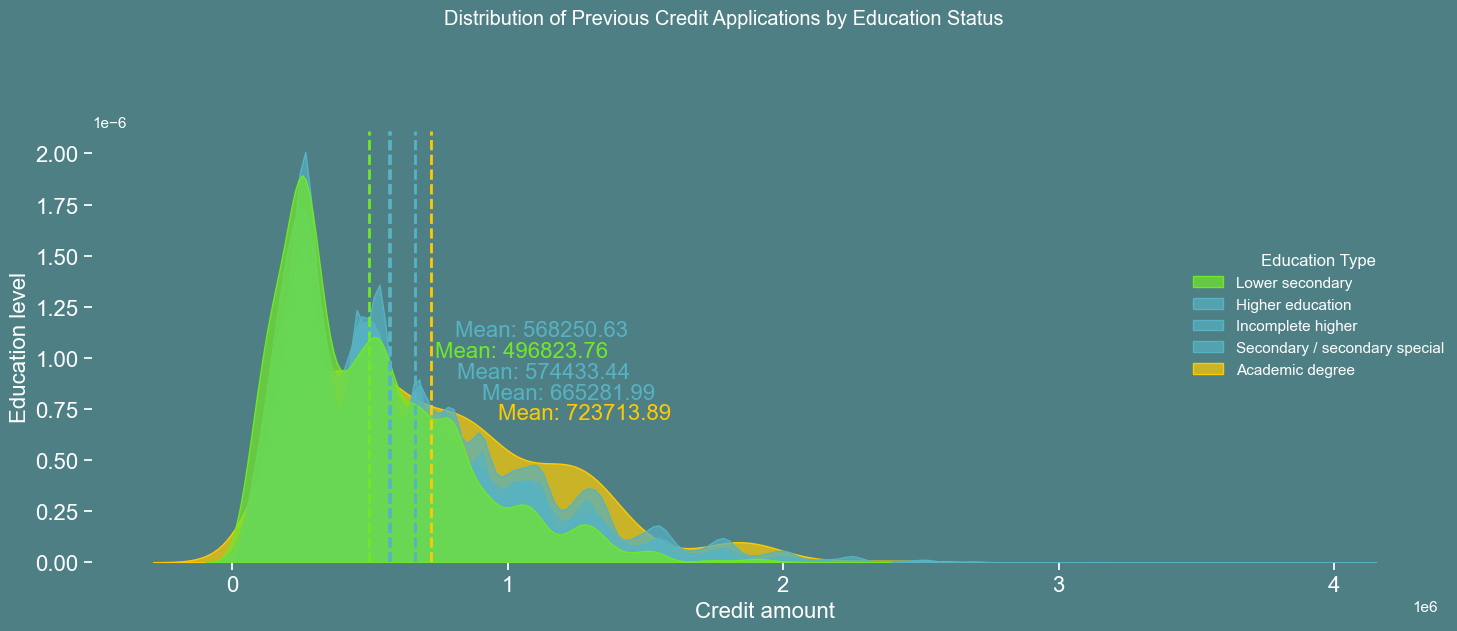

In [39]:
# Credit application to education status
# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')  # Set the exterior background

# Set the Seaborn theme
sns.set_theme(style="ticks")  # Choose your preferred style

# Define a custom palette for NAME_EDUCATION_TYPE
custom_palette = {
    'Secondary / secondary special': '#57b2c2',  # Light blue
    'Academic degree': '#ffca00',  # Yellow
    'Higher education': '#57b2c2',  # Light blue
    'Incomplete higher': '#57b2c2',  # Light blue#ffca00
    'Lower secondary': '#71e827'   # Green
}

# Define the order of the hue categories to place "Secondary / secondary special" first
hue_order = ['Lower secondary', 'Higher education', 'Incomplete higher', 'Secondary / secondary special', 'Academic degree']

# Create a displot for AMT_ANNUITY with the custom color palette
displot = sns.displot(
    data=m_a,
    x='AMT_CREDIT',
    hue='NAME_EDUCATION_TYPE',  # Color by education type
    hue_order=hue_order,  # Specify the order of hues
    kind='kde',  # Kernel density estimate
    height=6,  # Height of the figure
    aspect=2,  # Aspect ratio
    fill=True,  # Fill the area under the curve
    palette=custom_palette,  # Apply the custom palette
    alpha=0.7,  # Transparency of the fill
    common_norm=False  # Normalize the KDE separately for each hue
)

# Set the background color of the figure and axes
displot.fig.set_facecolor('#4d7f85')  # Set the exterior background
for ax in displot.axes.flatten():
    ax.set_facecolor('#4d7f85')  # Set the internal background of the axes
    ax.set_xlabel("Credit amount", color='white',fontsize=16)  # Set x-axis label
    ax.set_ylabel("Education level", color='white',fontsize=16)  # Set y-axis label
    ax.tick_params(axis='x', colors='white',labelsize=16)  # Set x-axis ticks to white
    ax.tick_params(axis='y', colors='white',labelsize=16)  # Set y-axis ticks to white

    # Remove the black lines (spines) from the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Modify legend text color to white
legend = displot.legend  # Access the legend
for text in legend.get_texts():
    text.set_color("white")  # Set the text color to white

# Set the legend title color to white
legend.set_title("Education Type")  # Set legend title if not set automatically
legend.get_title().set_color("white")  # Set the legend title color to white

# Calculate mean for AMT_ANNUITY grouped by education type
mean_values = m_a.groupby('NAME_EDUCATION_TYPE')['AMT_CREDIT'].mean().reset_index()

# Sort mean values to match hue_order
mean_values['order'] = mean_values['NAME_EDUCATION_TYPE'].apply(lambda x: hue_order.index(x))
mean_values_sorted = mean_values.sort_values(by='order')

# Add vertical lines for the means and annotations
for i, row in mean_values_sorted.iterrows():
    ax = displot.axes.flatten()[0]  # Use the first axis for annotations
    ax.axvline(row['AMT_CREDIT'], color=custom_palette[row['NAME_EDUCATION_TYPE']], linestyle='--', lw=2)
    
    # Set the text color to match the corresponding linestyle color
    annotation_color = custom_palette[row['NAME_EDUCATION_TYPE']]
    
    # Calculate y_offset based on index to prevent overlap
    y_offset = 100 + (i * 15)  # Adjust to move each subsequent annotation higher
    x_offset = 110  # Adjust to move annotations to the right
    
    # Move the annotation higher and to the right of the x-axis
    ax.annotate(f'Mean: {row["AMT_CREDIT"]:.2f}', 
                xy=(row['AMT_CREDIT'], 0), 
                xycoords='data', 
                color=annotation_color,  # Set annotation color to match linestyle
                fontsize=16, 
                ha='center', 
                va='bottom',  # Align text to bottom
                textcoords='offset points', 
                xytext=(x_offset, y_offset))  # Adjust these values to position it

# Set the title for the entire displot
displot.fig.suptitle('Distribution of Previous Credit Applications by Education Status\n', 
                       fontdict={'size': 20, 'weight': 'bold', 'color': 'white'}, y=1.05)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/v0/cdq_7tz578d0rt80jghl9ngh0000gn/T/ipykernel_2191/1989966615.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_values = m_a.groupby(['OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS']).size().unstack(fill_value=0)


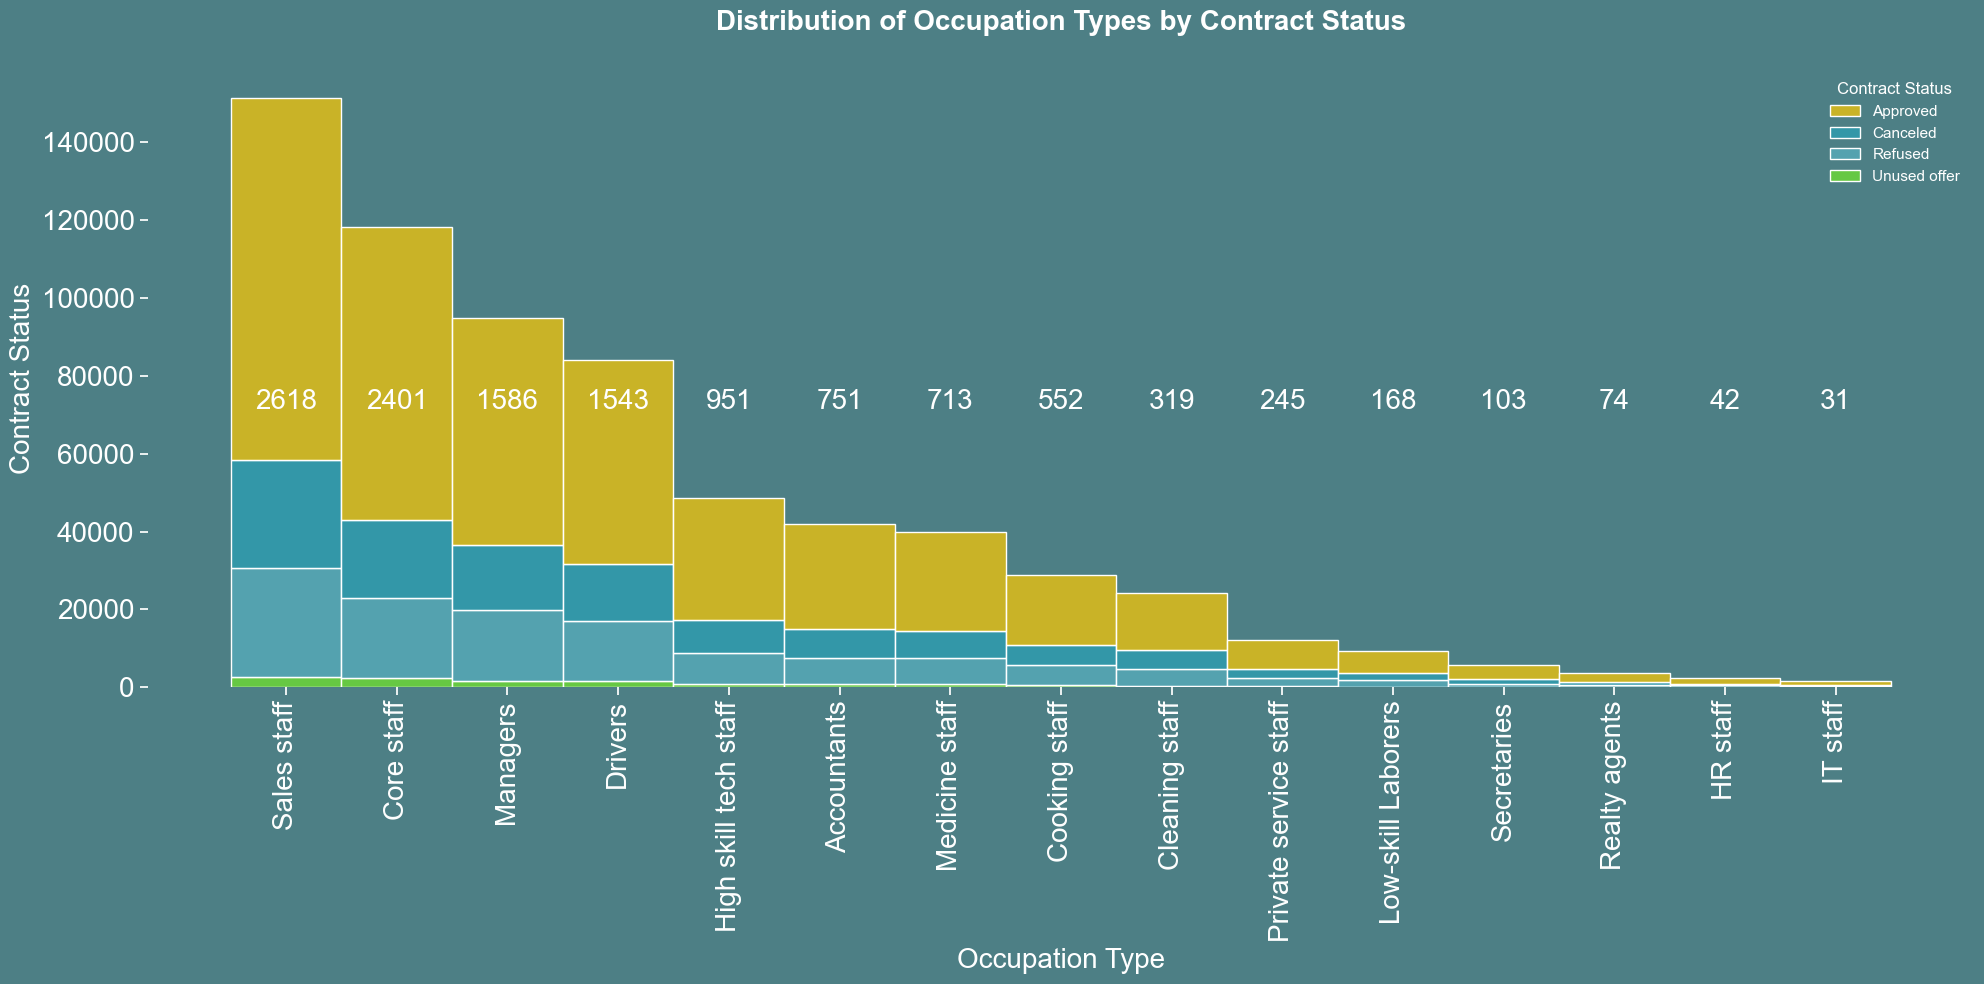

In [40]:
#Occupation type to contract type
# Replace infinite values with NaN
m_a.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, you may want to drop rows with NaN values if needed
# m_a.dropna(inplace=True)

# Create a custom order for OCCUPATION_TYPE
occupation_order = [
    'Sales staff',
    'Core staff',
    'Managers',
    'Drivers',
    'High skill tech staff',
    'Accountants',
    'Medicine staff',
    'Cooking staff',
    'Cleaning staff',
    'Private service staff',
    'Low-skill Laborers',
    'Secretaries',
    'Realty agents',
    'HR staff',
    'IT staff'
]

# Convert OCCUPATION_TYPE to a categorical type with a specified order
m_a['OCCUPATION_TYPE'] = pd.Categorical(m_a['OCCUPATION_TYPE'], categories=occupation_order, ordered=True)

# Set the Seaborn theme
sns.set_theme(style="ticks")

# Set the background color of the figure
plt.figure(figsize=[20, 10], facecolor='#4d7f85')

# Define a custom palette for NAME_CONTRACT_STATUS
custom_palette = {
    'Approved': '#ffca00',
    'Canceled': '#28a2b8',
    'Refused': '#57b2c2',
    'Unused offer': '#71e827'
}

# Create a histogram for OCCUPATION_TYPE, colored by NAME_CONTRACT_STATUS
histplot = sns.histplot(
    data=m_a,
    x='OCCUPATION_TYPE',
    hue='NAME_CONTRACT_STATUS',
    bins=30,
    kde=False,
    palette=custom_palette,
    alpha=0.7,
    multiple='stack',
    edgecolor='white'
)

# Adding mean annotations
# Calculate counts for each occupation type by contract status
count_values = m_a.groupby(['OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS']).size().unstack(fill_value=0)

# Annotate the bars with the counts
for occupation in count_values.index:
    for status in count_values.columns:
        count = count_values.loc[occupation, status]
        if count > 0:  # Only annotate if there are counts
            # Get the x position for the occupation type
            x_pos = occupation_order.index(occupation)
            # Get the y position for the annotation
            y_pos = histplot.patches[x_pos].get_height() - count  # Adjust for stacked bars
            
            # Annotate the count above the bar
            plt.annotate(f'{count}', 
                         xy=(x_pos, y_pos), 
                         xytext=(0, 200), 
                         textcoords='offset points', 
                         ha='center', 
                         color='white', 
                         fontsize=20)

# Set the background color of the figure and axes
plt.gcf().set_facecolor('#4d7f85')
plt.gca().set_facecolor('#4d7f85')

# Set labels and title
plt.xlabel("Occupation Type", color='white', fontsize=20)
plt.ylabel("Contract Status", color='white', fontsize=20)
plt.title('Distribution of Occupation Types by Contract Status\n', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'white'})

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90, color='white')

# Set tick parameters
plt.tick_params(axis='y', colors='white', labelsize=20)
plt.tick_params(axis='x', colors='white', labelsize=20)

# Modify legend text color to white
legend = plt.gca().get_legend()
for text in legend.get_texts():
    text.set_color("white")
legend.set_title("Contract Status")
legend.get_title().set_color("white")
legend.prop = {'size': 30}

# Set the legend background color to the same as the figure background and remove the frame
legend.get_frame().set_facecolor('#4d7f85')
legend.get_frame().set_linewidth(0)

# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_color('none')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
